# MRT3 - Optimal Scheduling




<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c2/De_La_Salle_University_Seal.svg/1200px-De_La_Salle_University_Seal.svg.png" alt="Alt text" width="100" height="100" align="center"/>
</div>

# <h1 align = "center"> A project presented for Principles of Data Science </h1>

##### <h4 align="center">Submitted by: <br> John Caleb Rejante <br> Emmanuel Pedernal <br> Lizelle Ann Cruz<br>Melanie Hauschild<br>Jose Alesandro Roxas<br><br><br> 9 December 2023 </h4>

# **<h1 align="center">Introduction</h1>**
<a id="0"></a>

 In this analysis, our primary focus is on unraveling the intricate patterns of passenger traffic over time across all MRT-3 stations. By delving into the temporal dynamics of passenger counts, we aim to identify both the lulls and peaks in activity, providing actionable insights for strategic operational adjustments.


 Specifically, we seek to pinpoint the times when each station experiences the least passenger load, offering opportunities for system maintenance and optimization during these downtimes. Simultaneously, we aim to identify the peak hours when stations, especially the busiest one, witness the highest passenger influx. This dual-pronged approach not only aids in operational planning for downtime but also equips the MRT-3 system to proactively prepare for and manage increased passenger demands during peak hours.

# Overview of Variables

Our research is based on the dataset **DOTC-MRT3 HOURLY RIDERSHIP REPORT** from the Freedom of Information (FOI). It compiles $17,520$ observations collected from the whole year of $January-December$ $2022$. These $18$ factors listed below are then employed as explanatory variables.

1. `ID`: Unique identification for each datapoint of entr/exit.
2. `Date`: Date of the collected data from 1 January 2022 to 31 December 2022
3. `Start Time`: Start of the ridership duration
4. `End Time`: End of the ridership duration
5. `Type`: Categorical type of ridership (entry/exit)
6. `North Ave`: Number of riders who entered/exited North Avenue Station.
7. `Quezon Ave`: Number of riders who entered/exited Quezon Avenue Station.
8. `GMA Kamuning`: Number of riders who entered/exited GMA Kamuning Station.
9. `Cubao`: Number of riders who entered/exited Cubao Station.
10. `Santolan`: Number of riders who entered/exited Santolan Station.
11. `Ortigas`: Number of riders who entered/exited Ortigas Station.
12. `Shaw Blvd`: Number of riders who entered/exited Shaw Blvd Station.
13. `Boni Ave`: Number of riders who entered/exited Boni Ave Station.
14. `Guadalupe`: Number of riders who entered/exited Guadalupe Station.
15. `Buendia`: Number of riders who entered/exited Buendia Station.
16. `Ayala Ave`: Number of riders who entered/exited Ayala Ave Station.
17. `Magallanes`: Number of riders who entered/exited Magallanes Station.
18. `Taft`: Number of riders who entered/exited Taft Station.


These variables collectively offer a comprehensive view of the MRT3 ridership traffic, laying the groundwork for optimization modeling and analysis.



# Goal
<a id="2"></a>

The Data Science team's goal: Leveraging the timestamp data per station, along with insights into the busiest station and its corresponding high-traffic times, our analysis is poised to deliver valuable recommendations for enhancing the overall efficiency and responsiveness of the MRT-3 system.

## Phase 1: Data Preprocessing


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.1) Import of necessary libraries</h2>
<a id="1.1"></a>

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm
%matplotlib inline
from datetime import time
from google.colab import files
from google.colab import drive

# import warnings
# warnings.filterwarnings('ignore')


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.2) Extraction of the dataset</h2>
<a id="1.2"></a>

The dataset initially reveals information about MRT3's ridership report.

In [2]:
#if on google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataframe, will change on final notebook to use path instead of collab

df = pd.read_excel('/content/drive/Shared drives/Data Science Group 9/Final Project/MRT Consolidated.xlsx',skiprows=2)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)


In [ ]:
#if not on google drive

# df = pd.read_excel('./data/MRT Consolidated.xlsx',skiprows=2)
# df.columns = df.iloc[0]
# df = df.iloc[1:].reset_index(drop=True)

In [ ]:
df.head(5)

0                  ID                 Date Start Time   End Time   Type  \
0  4456203:00 - 03:59  2022-01-01 00:00:00   03:00:00   03:59:59  Entry   
1  4456203:00 - 03:59  2022-01-01 00:00:00   03:00:00   03:59:59   Exit   
2  4456204:00 - 04:59  2022-01-01 00:00:00   04:00:00   04:59:59  Entry   
3  4456204:00 - 04:59  2022-01-01 00:00:00   04:00:00   04:59:59   Exit   
4  4456205:00 - 05:59  2022-01-01 00:00:00   05:00:00   05:59:59  Entry   

0 North Ave Quezon Ave GMA Kamuning Cubao Santolan Ortigas Shaw Blvd Boni Ave  \
0       NaN        NaN          NaN   NaN      NaN     NaN       NaN      NaN   
1       NaN        NaN          NaN   NaN      NaN     NaN       NaN      NaN   
2         0          0            0     0        0       0         0        0   
3         0          0            0     0        0       0         0        0   
4         0          0            0     0        0       0         0        0   

0 Guadalupe Buendia Ayala Ave Magallanes Taft  
0       NaN     NaN       NaN        NaN  NaN  
1       NaN     NaN       NaN        NaN  NaN  
2         0       0         0          0    0  
3         0       0         0          0    0  
4         0       0         0          0    0

In [ ]:
df.shape

(17520, 18)

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.3) Analyzing the structure of data</h2>
<a id="1.3"></a>

Data cleaning is always the first step in any data science project. At a glance, it is evident that there are items that has "all-null" station columns. Moreover, proper data type assignment and removing white space should also be done upon initial checking with the data.

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.4) Checking of unique and null values in each column</h2>
<a id="1.4"></a>

In [ ]:
unique_values = df.nunique()
unique = pd.DataFrame({'columns':unique_values.index, 'unique values':unique_values.values})
unique.reset_index(drop=True ,inplace=True)
unique

columns  unique values
0             ID           8760
1           Date            365
2     Start Time             24
3       End Time             24
4           Type              2
5      North Ave           3089
6     Quezon Ave           1458
7   GMA Kamuning           2948
8          Cubao           3853
9       Santolan           1087
10       Ortigas           2787
11     Shaw Blvd           3765
12      Boni Ave           2303
13     Guadalupe           2590
14       Buendia           1425
15     Ayala Ave           2977
16    Magallanes           2191
17          Taft           3627

No significant findings in the "unique values checking" of the dataframe.

In [ ]:
null_values = df.isnull().any()
null = pd.DataFrame({'columns':null_values.index, 'null values':null_values.values})
null.reset_index(drop=True ,inplace=True)
null

columns  null values
0             ID        False
1           Date        False
2     Start Time        False
3       End Time        False
4           Type        False
5      North Ave         True
6     Quezon Ave         True
7   GMA Kamuning         True
8          Cubao         True
9       Santolan         True
10       Ortigas         True
11     Shaw Blvd         True
12      Boni Ave         True
13     Guadalupe         True
14       Buendia         True
15     Ayala Ave         True
16    Magallanes         True
17          Taft         True


As expected in the initial scan of the dataframe, only the station columns have null values. It needs more investigation.

In [ ]:
# create a df where the station column values are null (or zero)

null_rows = df[df.iloc[:,5:].isnull().all(axis=1)]
zero_rows = df[df.iloc[:,5:].eq(0).all(axis=1)]

null_and_zero_df = pd.concat([null_rows, zero_rows],ignore_index=True)

#check the time duration where MRT3 has the most null (or zero) station columns
null_and_zero_df.groupby(['Start Time','End Time', 'Type'])['ID'].count().reset_index().sort_values('ID', ascending=False)

Start Time   End Time   Type   ID
2    01:00:00   01:59:59  Entry  364
3    01:00:00   01:59:59   Exit  363
6    03:00:00   03:59:59  Entry  363
7    03:00:00   03:59:59   Exit  363
4    02:00:00   02:59:59  Entry  360
5    02:00:00   02:59:59   Exit  360
46   23:00:00   23:59:59  Entry  354
1    00:00:00   00:59:59   Exit  341
47   23:00:00   23:59:59   Exit  312
0    00:00:00   00:59:59  Entry  263
45   22:00:00   22:59:59   Exit    8
44   22:00:00   22:59:59  Entry    8
9    04:00:00   04:59:59   Exit    8
8    04:00:00   04:59:59  Entry    7
42   21:00:00   21:59:59  Entry    7
10   05:00:00   05:59:59  Entry    6
40   20:00:00   20:59:59  Entry    6
11   05:00:00   05:59:59   Exit    6
41   20:00:00   20:59:59   Exit    6
43   21:00:00   21:59:59   Exit    6
39   19:00:00   19:59:59   Exit    5
30   15:00:00   15:59:59  Entry    5
37   18:00:00   18:59:59   Exit    5
36   18:00:00   18:59:59  Entry    5
35   17:00:00   17:59:59   Exit    5
34   17:00:00   17:59:59  Entry    5
33   16:00:00   16:59:59   Exit    5
32   16:00:00   16:59:59  Entry    5
31   15:00:00   15:59:59   Exit    5
38   19:00:00   19:59:59  Entry    5
29   14:00:00   14:59:59   Exit    5
28   14:00:00   14:59:59  Entry    5
18   09:00:00   09:59:59  Entry    5
12   06:00:00   06:59:59  Entry    5
13   06:00:00   06:59:59   Exit    5
14   07:00:00   07:59:59  Entry    5
15   07:00:00   07:59:59   Exit    5
16   08:00:00   08:59:59  Entry    5
17   08:00:00   08:59:59   Exit    5
19   09:00:00   09:59:59   Exit    5
27   13:00:00   13:59:59   Exit    5
20   10:00:00   10:59:59  Entry    5
21   10:00:00   10:59:59   Exit    5
22   11:00:00   11:59:59  Entry    5
23   11:00:00   11:59:59   Exit    5
25   12:00:00   12:59:59   Exit    5
26   13:00:00   13:59:59  Entry    5
24   12:00:00   12:59:59  Entry    5

In [ ]:
#identify the dates where MRT3 is not operational for the whole day

filled_null_and_zero_df = null_and_zero_df.fillna(0).groupby('Date')['ID'].count().reset_index().sort_values('ID', ascending=False)
filled_null_and_zero_df[filled_null_and_zero_df.ID == 48]

Date  ID
102 2022-04-13  48
106 2022-04-17  48
105 2022-04-16  48
104 2022-04-15  48
103 2022-04-14  48

Based on the *null_and_zero_df*, data is mostly not available between **23:00:00** to **3:59:59**. This is expected as the operating hours of MRT3 is from **4:30:00** to **22:30:00** (*Source*: *https://www.dotrmrt3.gov.ph/about-us*). Moreover, there are 5 days where the train has not operated for the whole day. These are the same dates of the **2022 Holy Week**.

# Phase 2: DataFrame information checking

Our goal is to ensure that our final dataset is error-free and ready for use.

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.1) Checking the columns</h2>
<a id="2.1"></a>

In [ ]:
df.columns

Index(['ID', 'Date', 'Start Time', 'End Time', 'Type', 'North Ave',
       'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas',
       'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave',
       'Magallanes', 'Taft'],
      dtype='object', name=0)

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.2) Checking the dtypes</h2>
<a id="2.2"></a>

In [ ]:
print(f"The data type of Start Time is {type(df['Start Time'][0])}")
print(f"The data type of End Time is {type(df['End Time'][0])}")

The data type of Start Time is <class 'datetime.time'>
The data type of End Time is <class 'str'>


As seen above, **End Time** column is of *<class 'str'>*, this needs to be typcasted to datetime.time

In [ ]:
df.dtypes

0
ID              object
Date            object
Start Time      object
End Time        object
Type            object
North Ave       object
Quezon Ave      object
GMA Kamuning    object
Cubao           object
Santolan        object
Ortigas         object
Shaw Blvd       object
Boni Ave        object
Guadalupe       object
Buendia         object
Ayala Ave       object
Magallanes      object
Taft            object
dtype: object

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.3) Checking the info()</h2>
<a id="2.3"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            17520 non-null  object
 1   Date          17520 non-null  object
 2   Start Time    17520 non-null  object
 3   End Time      17520 non-null  object
 4   Type          17520 non-null  object
 5   North Ave     14358 non-null  object
 6   Quezon Ave    14367 non-null  object
 7   GMA Kamuning  14369 non-null  object
 8   Cubao         14371 non-null  object
 9   Santolan      14369 non-null  object
 10  Ortigas       14265 non-null  object
 11  Shaw Blvd     14367 non-null  object
 12  Boni Ave      14368 non-null  object
 13  Guadalupe     14266 non-null  object
 14  Buendia       14338 non-null  object
 15  Ayala Ave     14362 non-null  object
 16  Magallanes    14365 non-null  object
 17  Taft          14362 non-null  object
dtypes: object(18)
memory usage: 2.4+ MB


- The total number of columns is $17$
- The total number of entries is $17520$
- Station columns are all $float64$ dtypes
- The **End Time** column is not in its proper dtype
- Nulls were already investigated

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.4) Checking the describe()</h2>
<a id="2.4"></a>

In [ ]:
df[df.Type == 'Entry'].describe().T

count unique                  top  freq
0                                                   
ID            8760   8760   4456203:00 - 03:59     1
Date          8760    365  2022-01-01 00:00:00    24
Start Time    8760     24             03:00:00   365
End Time      8760     24             03:59:59   365
Type          8760      1                Entry  8760
North Ave     7179   2367                    0   707
Quezon Ave    7184   1368                    0   363
GMA Kamuning  7184   2433                    0   353
Cubao         7184   2838                    0   354
Santolan      7184    907                    0   356
Ortigas       7081   2253                    0   249
Shaw Blvd     7184   2993                    0   357
Boni Ave      7184   2024                    0   357
Guadalupe     7083   2158                    0   254
Buendia       7169   1123                    0   486
Ayala Ave     7181   2418                    0   368
Magallanes    7183   2019                    0   414
Taft          7181   2677                    0   702

**Entry in Stations**
- The average number of passengers entering each station at any given hour is around 265.92 to 1846.19.
- The minimum number of passengers is zero since there are days where MRT3 did not operate.
- Based on the mean of each station, **Taft** is possibly the busiest entry station with an average of $1846.19$ passengers per hour with **Shaw Blvd** being the second busiest.
- In contrast, **Santolan** station has the least number of entering passengers per hour on average ($265.91$ number of passengers). Even at its peak, the maximum number of hourly passengers is only at $1177$.

In [ ]:
df[df.Type == 'Exit'].describe().T

count unique                  top  freq
0                                                   
ID            8760   8760   4456203:00 - 03:59     1
Date          8760    365  2022-01-01 00:00:00    24
Start Time    8760     24             03:00:00   365
End Time      8760     24             03:59:59   365
Type          8760      1                 Exit  8760
North Ave     7179   2510                    0   786
Quezon Ave    7183   1307                    0   418
GMA Kamuning  7185   2319                    0   352
Cubao         7187   3081                    0   346
Santolan      7185    995                    0   358
Ortigas       7184   2195                    0   346
Shaw Blvd     7183   2891                    0   346
Boni Ave      7184   1989                    0   374
Guadalupe     7183   2217                    0   420
Buendia       7169   1132                    0   520
Ayala Ave     7181   2275                    0   593
Magallanes    7182   1429                    0   683
Taft          7181   2971                    0   707

**Exit in Stations**
- The average number of passengers exiting each station at any given hour is around 269.17 to 1864.82.
- The minimum number of passengers is zero since there are days where MRT3 did not operate.
- Based on the mean of each station, **Taft** is possibly the busiest exit station with an average of $1864.82$ passengers per hour with **Cubao** being the second busiest.
- In contrast, **Santolan** station has the least number of entering passengers per hour on average ($269.17$ number of passengers). Even at its peak, the maximum number of hourly passengers is only at $1186$.

# Phase 3: Data Cleaning

To ensure that the dataframe to be used for the EDA and modelling will yield prudent and error-free results, it is important to clean the dataframe first before proceeding to the next step. We will be adopting the conservative approach to drop the rows where MRT3 the time duration is beyond operating hours. Moreover, we will be replacing a zero value for the days where the MRT3 did not operate for the day (during the Holy Week or any other instance). It is also imperative to properly typecast the **End Time** column to a *<class 'datetime.time'>*.


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.1) Typecasting the End Time column</h2>
<a id="3.1"></a>

In [ ]:
# strip str dtypes

df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

# convert start and end time from string to datetime.time

df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S').dt.time
df['End Time'] = pd.to_datetime(df['End Time'], format='%H:%M:%S').dt.time

In [ ]:
print(f"The data type of Start Time is {type(df['Start Time'][0])}")
print(f"The data type of End Time is {type(df['End Time'][0])}")

The data type of Start Time is <class 'datetime.time'>
The data type of End Time is <class 'datetime.time'>


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.2) Dropping Rows Beyond Operational Hours</h2>
<a id="3.2"></a>

In [ ]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[(df['Start Time'] == time(23,0,0)) |
           (df['Start Time'] == time(0,0,0)) |
           (df['Start Time'] == time(1,0,0)) |
           (df['Start Time'] == time(2,0,0)) |
           (df['Start Time'] == time(3,0,0))].index)
print(f"Dataset size after:\t{df.shape[0]}")

Dataset size before:	17520
Dataset size after:	13870


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.3) Replacing Null Values with Zero</h2>
<a id="3.3"></a>

In [ ]:
df = df.fillna(0)
df

0                      ID       Date Start Time  End Time   Type  North Ave  \
2      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59  Entry        0.0   
3      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59   Exit        0.0   
4      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59  Entry        0.0   
5      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59   Exit        0.0   
6      4456206:00 - 06:59 2022-01-01   06:00:00  06:59:59  Entry      227.0   
...                   ...        ...        ...       ...    ...        ...   
17507  4492620:00 - 20:59 2022-12-31   20:00:00  20:59:59  Entry        0.0   
17508  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59   Exit        1.0   
17509  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59  Entry        0.0   
17510  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59   Exit        0.0   
17511  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59  Entry        0.0   

0      Quezon Ave  GMA Kamuning  Cubao  Santolan  Ortigas  Shaw Blvd  \
2             0.0           0.0    0.0       0.0      0.0        0.0   
3             0.0           0.0    0.0       0.0      0.0        0.0   
4             0.0           0.0    0.0       0.0      0.0        0.0   
5             0.0           0.0    0.0       0.0      0.0        0.0   
6           177.0         453.0  482.0      27.0    157.0      454.0   
...           ...           ...    ...       ...      ...        ...   
17507         8.0          32.0  101.0      49.0    271.0      325.0   
17508         0.0           0.0    0.0       0.0      0.0        0.0   
17509         0.0           0.0    0.0       0.0      0.0        0.0   
17510         0.0           0.0    0.0       0.0      0.0        0.0   
17511         0.0           0.0    0.0       0.0      0.0        0.0   

0      Boni Ave  Guadalupe  Buendia  Ayala Ave  Magallanes   Taft  
2           0.0        0.0      0.0        0.0         0.0    0.0  
3           0.0        0.0      0.0        0.0         0.0    0.0  
4           0.0        0.0      0.0        0.0         0.0    0.0  
5           0.0        0.0      0.0        0.0         0.0    0.0  
6         150.0      227.0     58.0      199.0       221.0  525.0  
...         ...        ...      ...        ...         ...    ...  
17507     135.0      325.0     44.0      248.0        83.0  439.0  
17508       0.0        0.0      0.0        0.0         0.0    0.0  
17509       0.0        0.0      0.0        0.0         0.0    0.0  
17510       0.0        0.0      0.0        0.0         0.0    0.0  
17511       0.0        0.0      0.0        0.0         0.0    0.0  

[13870 rows x 18 columns]

# Phase 4: Adding Additional Features

We add additional features into our dataset in order to gather monthly and daily trends for our analysis,

# 4.1 Getting Average and Total Riders Per Station

In [ ]:
df['Average']= ((df["North Ave"]+ df["Quezon Ave"] + df["GMA Kamuning"] + df["Cubao"] + df["Santolan"] +df["Ortigas"] +df["Shaw Blvd"] + df["Boni Ave"] + df["Guadalupe"] + df["Buendia"] + df["Ayala Ave"] +df["Magallanes"] + df["Taft"])/13).astype(int)

In [ ]:
df['Totals']= (df["North Ave"]+ df["Quezon Ave"] + df["GMA Kamuning"] + df["Cubao"] + df["Santolan"] +df["Ortigas"] +df["Shaw Blvd"] + df["Boni Ave"] + df["Guadalupe"] + df["Buendia"] + df["Ayala Ave"] +df["Magallanes"] + df["Taft"]).astype(int)

In [ ]:
df.head()

0                  ID       Date Start Time  End Time   Type  North Ave  \
2  4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59  Entry        0.0   
3  4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59   Exit        0.0   
4  4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59  Entry        0.0   
5  4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59   Exit        0.0   
6  4456206:00 - 06:59 2022-01-01   06:00:00  06:59:59  Entry      227.0   

0  Quezon Ave  GMA Kamuning  Cubao  Santolan  Ortigas  Shaw Blvd  Boni Ave  \
2         0.0           0.0    0.0       0.0      0.0        0.0       0.0   
3         0.0           0.0    0.0       0.0      0.0        0.0       0.0   
4         0.0           0.0    0.0       0.0      0.0        0.0       0.0   
5         0.0           0.0    0.0       0.0      0.0        0.0       0.0   
6       177.0         453.0  482.0      27.0    157.0      454.0     150.0   

0  Guadalupe  Buendia  Ayala Ave  Magallanes   Taft  Average  Totals  
2        0.0      0.0        0.0         0.0    0.0        0       0  
3        0.0      0.0        0.0         0.0    0.0        0       0  
4        0.0      0.0        0.0         0.0    0.0        0       0  
5        0.0      0.0        0.0         0.0    0.0        0       0  
6      227.0     58.0      199.0       221.0  525.0      258    3357

# 4.2 Categorizing Dates by Month

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df['Month'] = df['Month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'

})

In [ ]:
df['Month'] = pd.Categorical(df['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [ ]:
df

0                      ID       Date Start Time  End Time   Type  North Ave  \
2      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59  Entry        0.0   
3      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59   Exit        0.0   
4      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59  Entry        0.0   
5      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59   Exit        0.0   
6      4456206:00 - 06:59 2022-01-01   06:00:00  06:59:59  Entry      227.0   
...                   ...        ...        ...       ...    ...        ...   
17507  4492620:00 - 20:59 2022-12-31   20:00:00  20:59:59  Entry        0.0   
17508  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59   Exit        1.0   
17509  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59  Entry        0.0   
17510  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59   Exit        0.0   
17511  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59  Entry        0.0   

0      Quezon Ave  GMA Kamuning  Cubao  Santolan  ...  Shaw Blvd  Boni Ave  \
2             0.0           0.0    0.0       0.0  ...        0.0       0.0   
3             0.0           0.0    0.0       0.0  ...        0.0       0.0   
4             0.0           0.0    0.0       0.0  ...        0.0       0.0   
5             0.0           0.0    0.0       0.0  ...        0.0       0.0   
6           177.0         453.0  482.0      27.0  ...      454.0     150.0   
...           ...           ...    ...       ...  ...        ...       ...   
17507         8.0          32.0  101.0      49.0  ...      325.0     135.0   
17508         0.0           0.0    0.0       0.0  ...        0.0       0.0   
17509         0.0           0.0    0.0       0.0  ...        0.0       0.0   
17510         0.0           0.0    0.0       0.0  ...        0.0       0.0   
17511         0.0           0.0    0.0       0.0  ...        0.0       0.0   

0      Guadalupe  Buendia  Ayala Ave  Magallanes   Taft  Average  Totals  \
2            0.0      0.0        0.0         0.0    0.0        0       0   
3            0.0      0.0        0.0         0.0    0.0        0       0   
4            0.0      0.0        0.0         0.0    0.0        0       0   
5            0.0      0.0        0.0         0.0    0.0        0       0   
6          227.0     58.0      199.0       221.0  525.0      258    3357   
...          ...      ...        ...         ...    ...      ...     ...   
17507      325.0     44.0      248.0        83.0  439.0      158    2060   
17508        0.0      0.0        0.0         0.0    0.0        0       1   
17509        0.0      0.0        0.0         0.0    0.0        0       0   
17510        0.0      0.0        0.0         0.0    0.0        0       0   
17511        0.0      0.0        0.0         0.0    0.0        0       0   

0      Month  
2        Jan  
3        Jan  
4        Jan  
5        Jan  
6        Jan  
...      ...  
17507    Dec  
17508    Dec  
17509    Dec  
17510    Dec  
17511    Dec  

[13870 rows x 21 columns]

# 4.3 Categorizing Dates by Day of the Week

In [ ]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [ ]:
df['Day of Week'] = df['Day of Week'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thur',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})

In [ ]:
df['Day of Week'] = pd.Categorical(df['Day of Week'], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

In [ ]:
df

0                      ID       Date Start Time  End Time   Type  North Ave  \
2      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59  Entry        0.0   
3      4456204:00 - 04:59 2022-01-01   04:00:00  04:59:59   Exit        0.0   
4      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59  Entry        0.0   
5      4456205:00 - 05:59 2022-01-01   05:00:00  05:59:59   Exit        0.0   
6      4456206:00 - 06:59 2022-01-01   06:00:00  06:59:59  Entry      227.0   
...                   ...        ...        ...       ...    ...        ...   
17507  4492620:00 - 20:59 2022-12-31   20:00:00  20:59:59  Entry        0.0   
17508  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59   Exit        1.0   
17509  4492621:00 - 21:59 2022-12-31   21:00:00  21:59:59  Entry        0.0   
17510  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59   Exit        0.0   
17511  4492622:00 - 22:59 2022-12-31   22:00:00  22:59:59  Entry        0.0   

0      Quezon Ave  GMA Kamuning  Cubao  Santolan  ...  Boni Ave  Guadalupe  \
2             0.0           0.0    0.0       0.0  ...       0.0        0.0   
3             0.0           0.0    0.0       0.0  ...       0.0        0.0   
4             0.0           0.0    0.0       0.0  ...       0.0        0.0   
5             0.0           0.0    0.0       0.0  ...       0.0        0.0   
6           177.0         453.0  482.0      27.0  ...     150.0      227.0   
...           ...           ...    ...       ...  ...       ...        ...   
17507         8.0          32.0  101.0      49.0  ...     135.0      325.0   
17508         0.0           0.0    0.0       0.0  ...       0.0        0.0   
17509         0.0           0.0    0.0       0.0  ...       0.0        0.0   
17510         0.0           0.0    0.0       0.0  ...       0.0        0.0   
17511         0.0           0.0    0.0       0.0  ...       0.0        0.0   

0      Buendia  Ayala Ave  Magallanes   Taft  Average  Totals  Month  \
2          0.0        0.0         0.0    0.0        0       0    Jan   
3          0.0        0.0         0.0    0.0        0       0    Jan   
4          0.0        0.0         0.0    0.0        0       0    Jan   
5          0.0        0.0         0.0    0.0        0       0    Jan   
6         58.0      199.0       221.0  525.0      258    3357    Jan   
...        ...        ...         ...    ...      ...     ...    ...   
17507     44.0      248.0        83.0  439.0      158    2060    Dec   
17508      0.0        0.0         0.0    0.0        0       1    Dec   
17509      0.0        0.0         0.0    0.0        0       0    Dec   
17510      0.0        0.0         0.0    0.0        0       0    Dec   
17511      0.0        0.0         0.0    0.0        0       0    Dec   

0      Day of Week  
2              Sat  
3              Sat  
4              Sat  
5              Sat  
6              Sat  
...            ...  
17507          Sat  
17508          Sat  
17509          Sat  
17510          Sat  
17511          Sat  

[13870 rows x 22 columns]

# Phase 5: EDA

Our EDA is divided into the following parts:

* Monthly Trends
* Daily Trends
* Hourly Trends
* Station Trends
* Insights and Policy Recommendations



# 5.1 Monthly MRT Trends

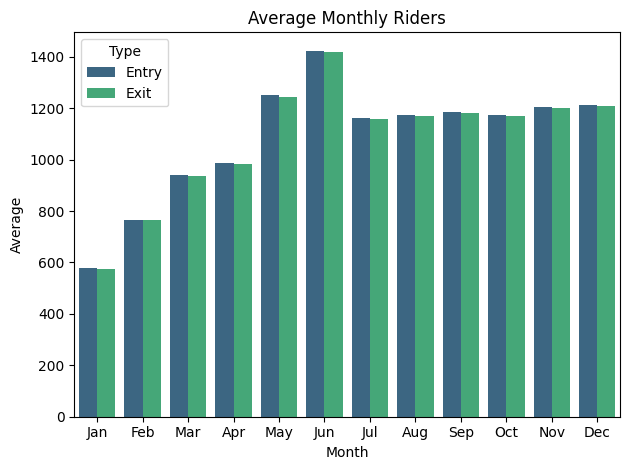

In [ ]:
sns.barplot(x='Month', y='Average',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Average"].mean(), palette='viridis').set(title = "Average Monthly Riders")
plt.tight_layout()

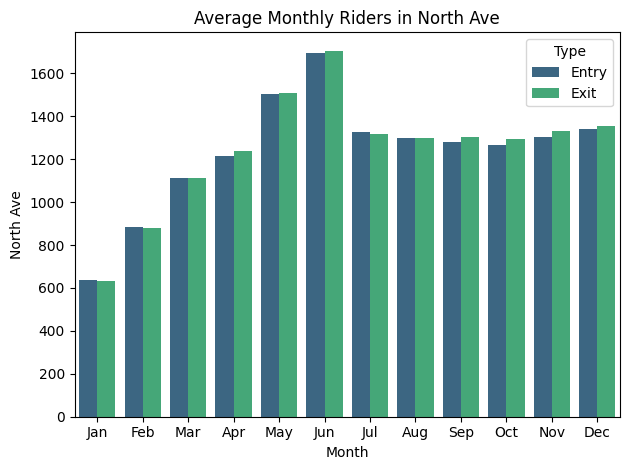

In [ ]:
sns.barplot(x='Month', y='North Ave',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["North Ave"].mean(), palette='viridis').set(title = "Average Monthly Riders in North Ave")
plt.tight_layout()

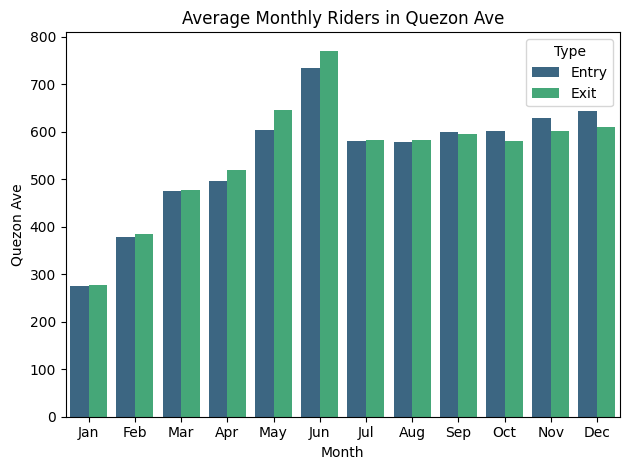

In [ ]:
sns.barplot(x='Month', y='Quezon Ave',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Quezon Ave"].mean(), palette='viridis').set(title = "Average Monthly Riders in Quezon Ave")
plt.tight_layout()

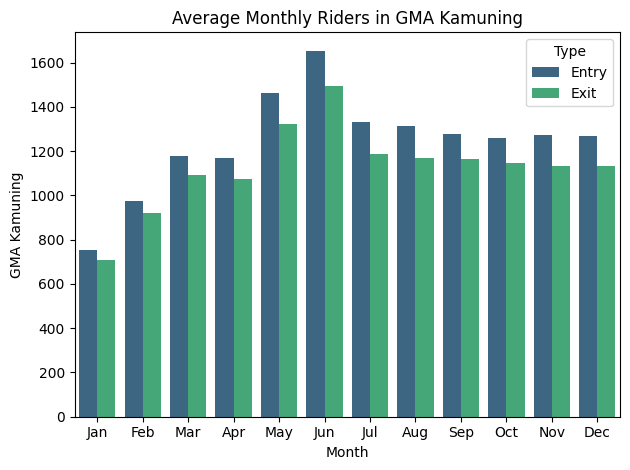

In [ ]:
sns.barplot(x='Month', y='GMA Kamuning',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["GMA Kamuning"].mean(), palette='viridis').set(title = "Average Monthly Riders in GMA Kamuning")
plt.tight_layout()

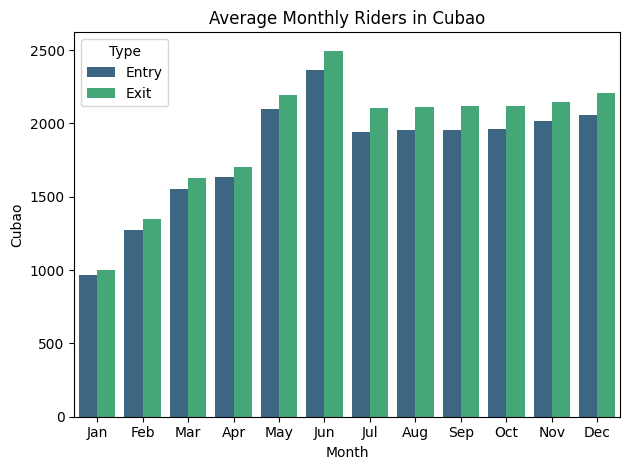

In [ ]:
sns.barplot(x='Month', y='Cubao',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Cubao"].mean(), palette='viridis').set(title = "Average Monthly Riders in Cubao")
plt.tight_layout()

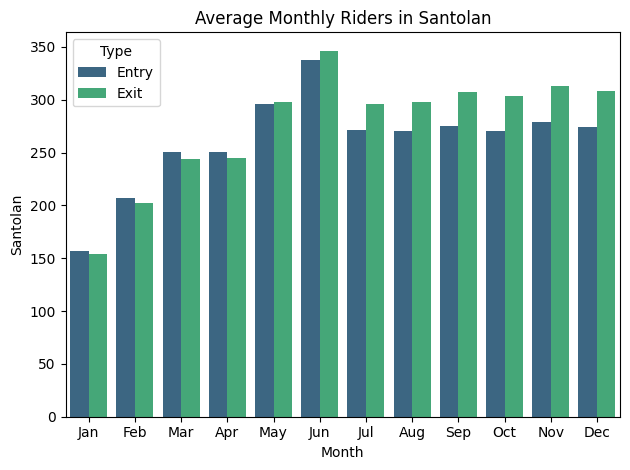

In [ ]:
sns.barplot(x='Month', y='Santolan',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Santolan"].mean(), palette='viridis').set(title = "Average Monthly Riders in Santolan")
plt.tight_layout()

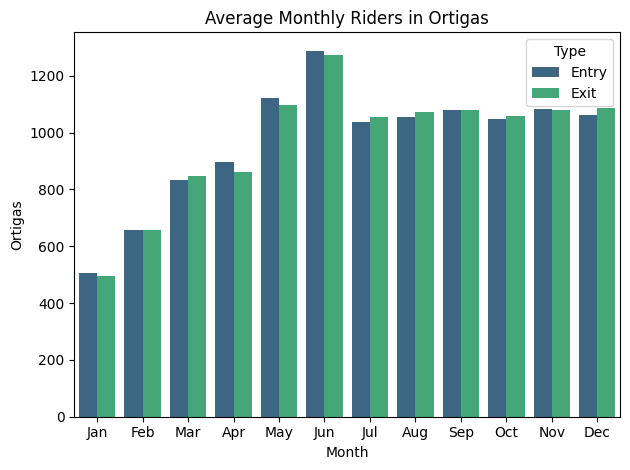

In [ ]:
sns.barplot(x='Month', y='Ortigas',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Ortigas"].mean(), palette='viridis').set(title = "Average Monthly Riders in Ortigas")
plt.tight_layout()

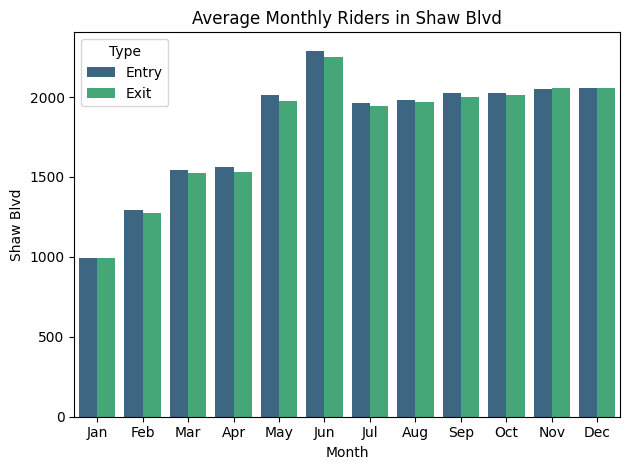

In [ ]:
sns.barplot(x='Month', y='Shaw Blvd',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Shaw Blvd"].mean(), palette='viridis').set(title = "Average Monthly Riders in Shaw Blvd")
plt.tight_layout()

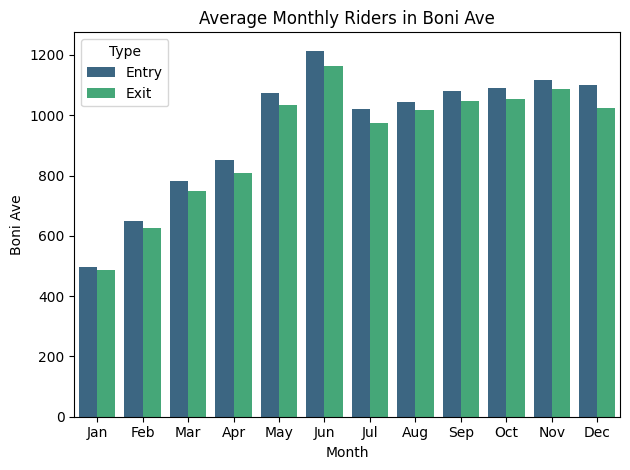

In [ ]:
sns.barplot(x='Month', y='Boni Ave',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Boni Ave"].mean(), palette='viridis').set(title = "Average Monthly Riders in Boni Ave")
plt.tight_layout()

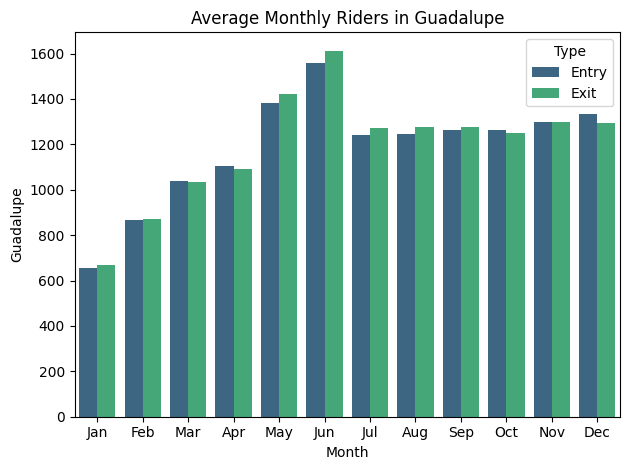

In [ ]:
sns.barplot(x='Month', y='Guadalupe',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Guadalupe"].mean(), palette='viridis').set(title = "Average Monthly Riders in Guadalupe")
plt.tight_layout()

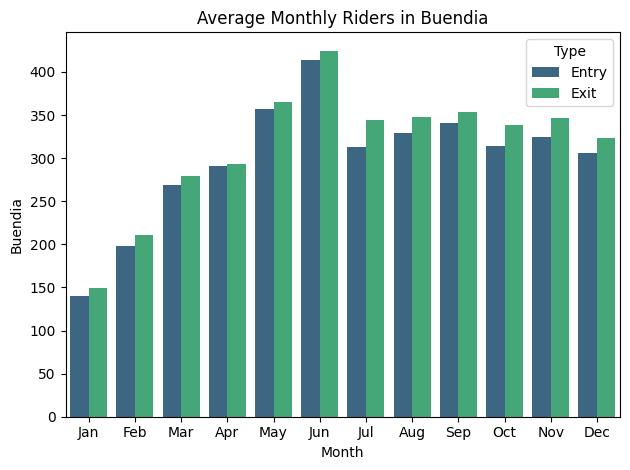

In [ ]:
sns.barplot(x='Month', y='Buendia',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Buendia"].mean(), palette='viridis').set(title = "Average Monthly Riders in Buendia")
plt.tight_layout()

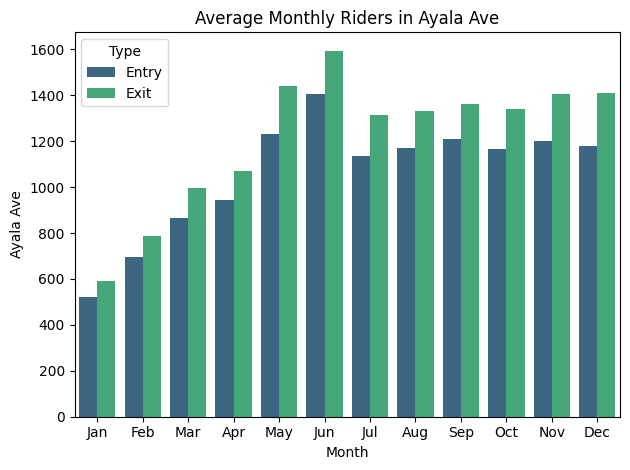

In [ ]:
sns.barplot(x='Month', y='Ayala Ave',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Ayala Ave"].mean(), palette='viridis').set(title = "Average Monthly Riders in Ayala Ave")
plt.tight_layout()

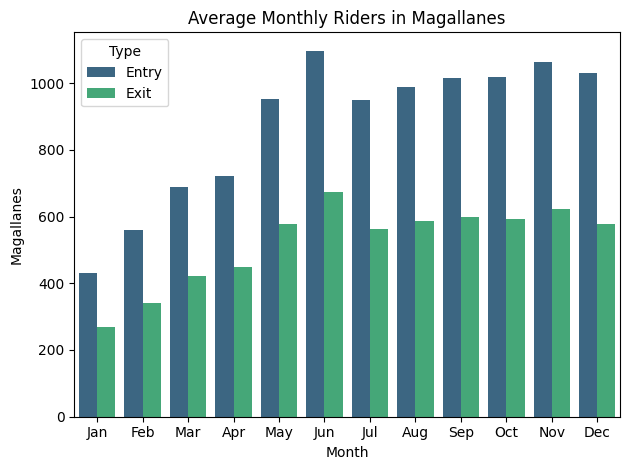

In [ ]:
sns.barplot(x='Month', y='Magallanes',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Magallanes"].mean(), palette='viridis').set(title = "Average Monthly Riders in Magallanes")
plt.tight_layout()

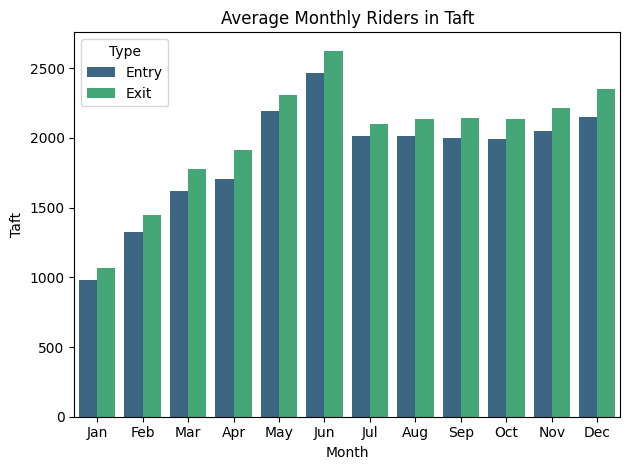

In [ ]:
sns.barplot(x='Month', y='Taft',hue='Type', data=df.groupby(["Month", "Type"], as_index = False)["Taft"].mean(), palette='viridis').set(title = "Average Monthly Riders in Taft")
plt.tight_layout()

# 5.2 Daily MRT Trends

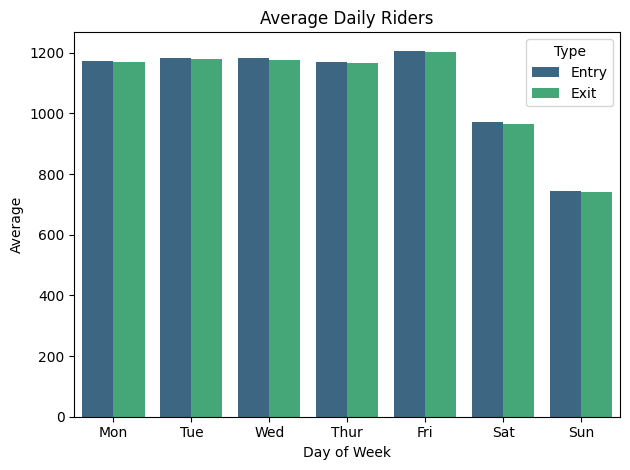

In [ ]:
sns.barplot(x='Day of Week', y='Average',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Average"].mean(), palette='viridis').set(title = "Average Daily Riders")
plt.tight_layout()

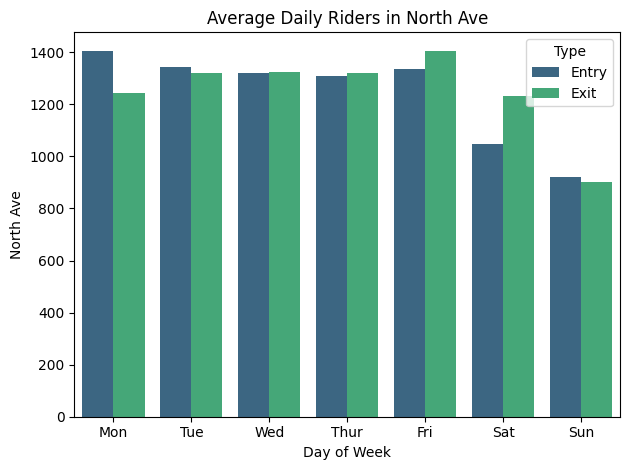

In [ ]:
sns.barplot(x='Day of Week', y='North Ave',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["North Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in North Ave")
plt.tight_layout()

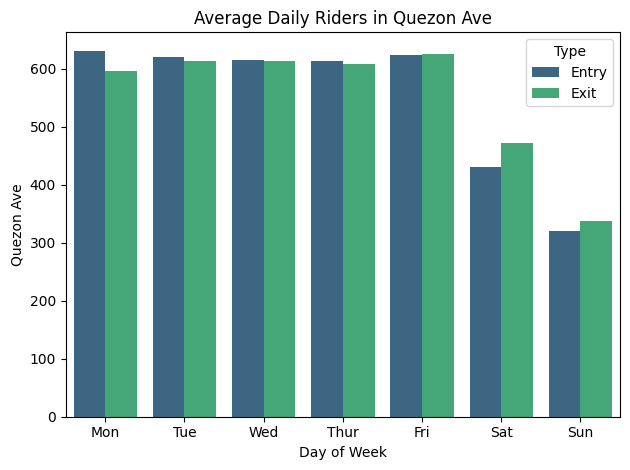

In [ ]:
sns.barplot(x='Day of Week', y='Quezon Ave',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Quezon Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Quezon Ave")
plt.tight_layout()

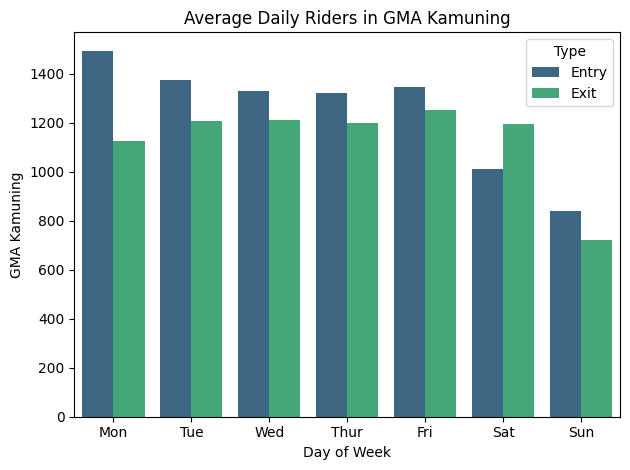

In [ ]:
sns.barplot(x='Day of Week', y='GMA Kamuning',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["GMA Kamuning"].mean(), palette='viridis').set(title = "Average Daily Riders in GMA Kamuning")
plt.tight_layout()

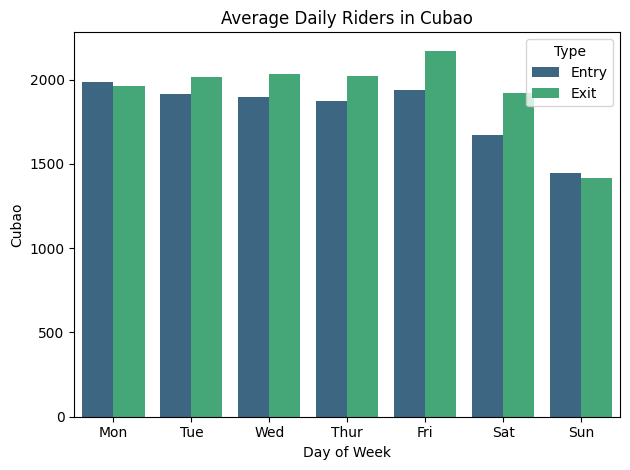

In [ ]:
sns.barplot(x='Day of Week', y='Cubao',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Cubao"].mean(), palette='viridis').set(title = "Average Daily Riders in Cubao")
plt.tight_layout()

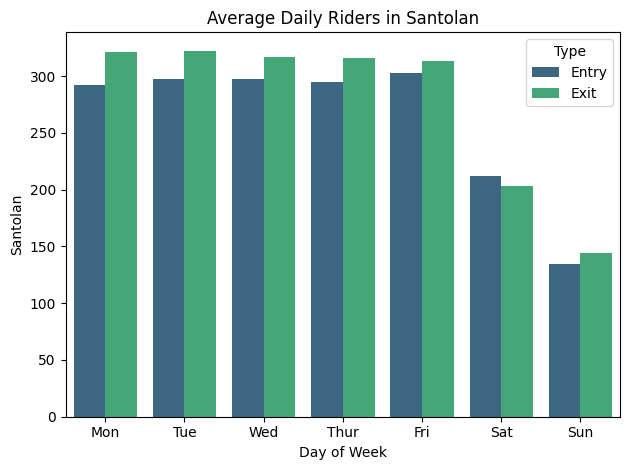

In [ ]:
sns.barplot(x='Day of Week', y='Santolan',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Santolan"].mean(), palette='viridis').set(title = "Average Daily Riders in Santolan")
plt.tight_layout()

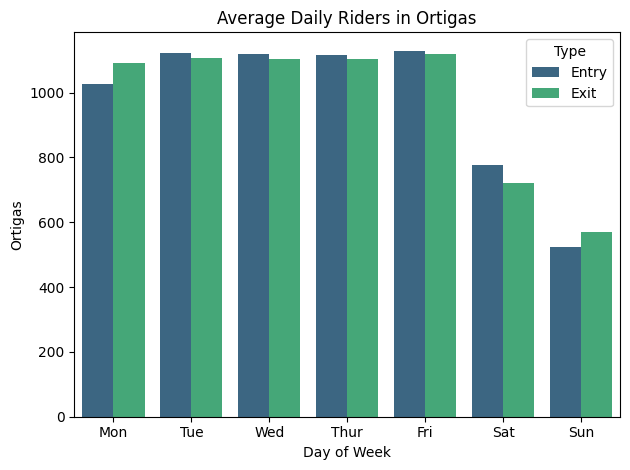

In [ ]:
sns.barplot(x='Day of Week', y='Ortigas',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Ortigas"].mean(), palette='viridis').set(title = "Average Daily Riders in Ortigas")
plt.tight_layout()

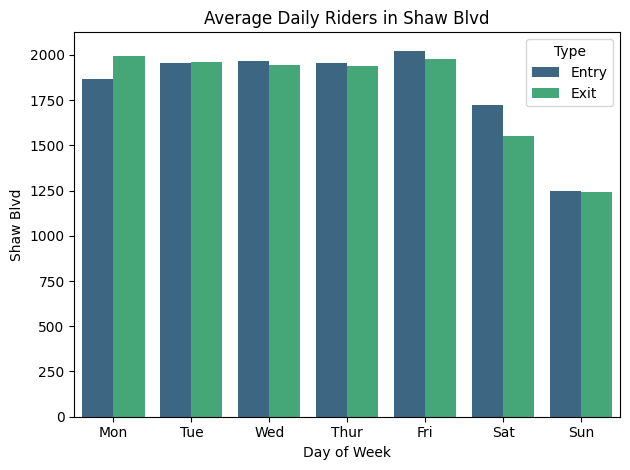

In [ ]:
sns.barplot(x='Day of Week', y='Shaw Blvd',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Shaw Blvd"].mean(), palette='viridis').set(title = "Average Daily Riders in Shaw Blvd")
plt.tight_layout()

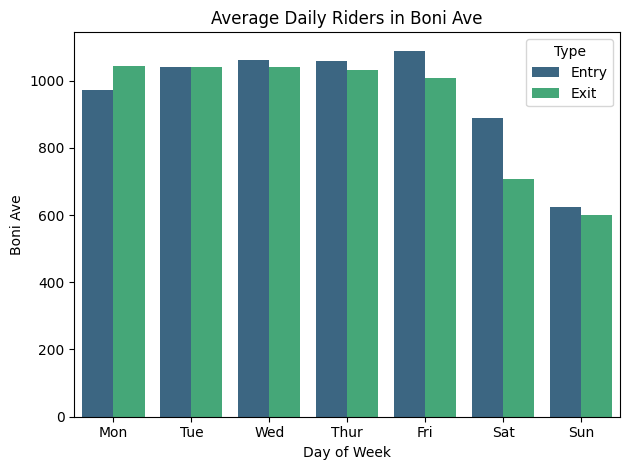

In [ ]:
sns.barplot(x='Day of Week', y='Boni Ave',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Boni Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Boni Ave")
plt.tight_layout()

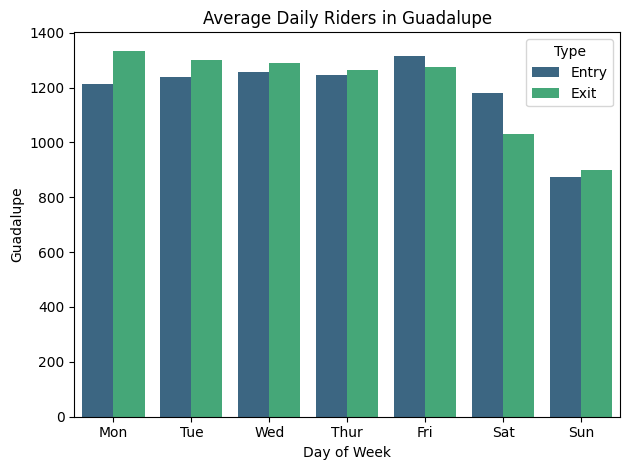

In [ ]:
sns.barplot(x='Day of Week', y='Guadalupe',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Guadalupe"].mean(), palette='viridis').set(title = "Average Daily Riders in Guadalupe")
plt.tight_layout()

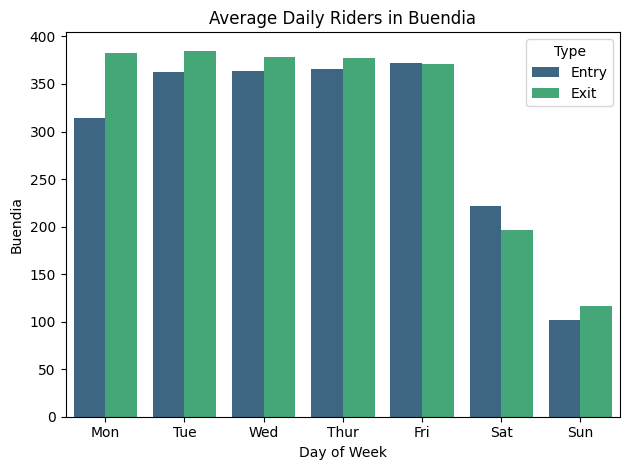

In [ ]:
sns.barplot(x='Day of Week', y='Buendia',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Buendia"].mean(), palette='viridis').set(title = "Average Daily Riders in Buendia")
plt.tight_layout()

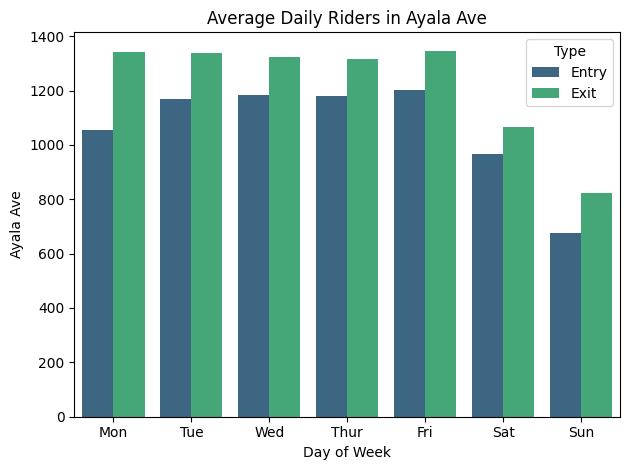

In [ ]:
sns.barplot(x='Day of Week', y='Ayala Ave',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Ayala Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Ayala Ave")
plt.tight_layout()

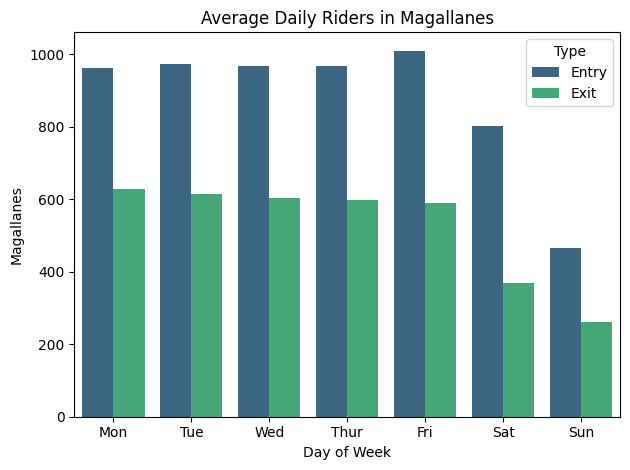

In [ ]:
sns.barplot(x='Day of Week', y='Magallanes',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Magallanes"].mean(), palette='viridis').set(title = "Average Daily Riders in Magallanes")
plt.tight_layout()

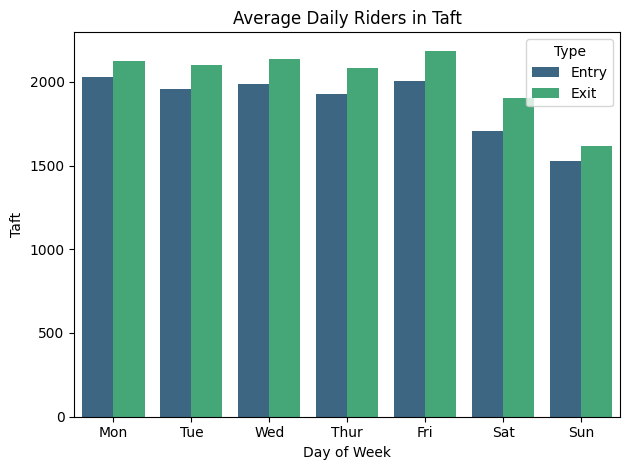

In [ ]:
sns.barplot(x='Day of Week', y='Taft',hue='Type', data=df.groupby(["Day of Week", "Type"], as_index = False)["Taft"].mean(), palette='viridis').set(title = "Average Daily Riders in Taft")
plt.tight_layout()

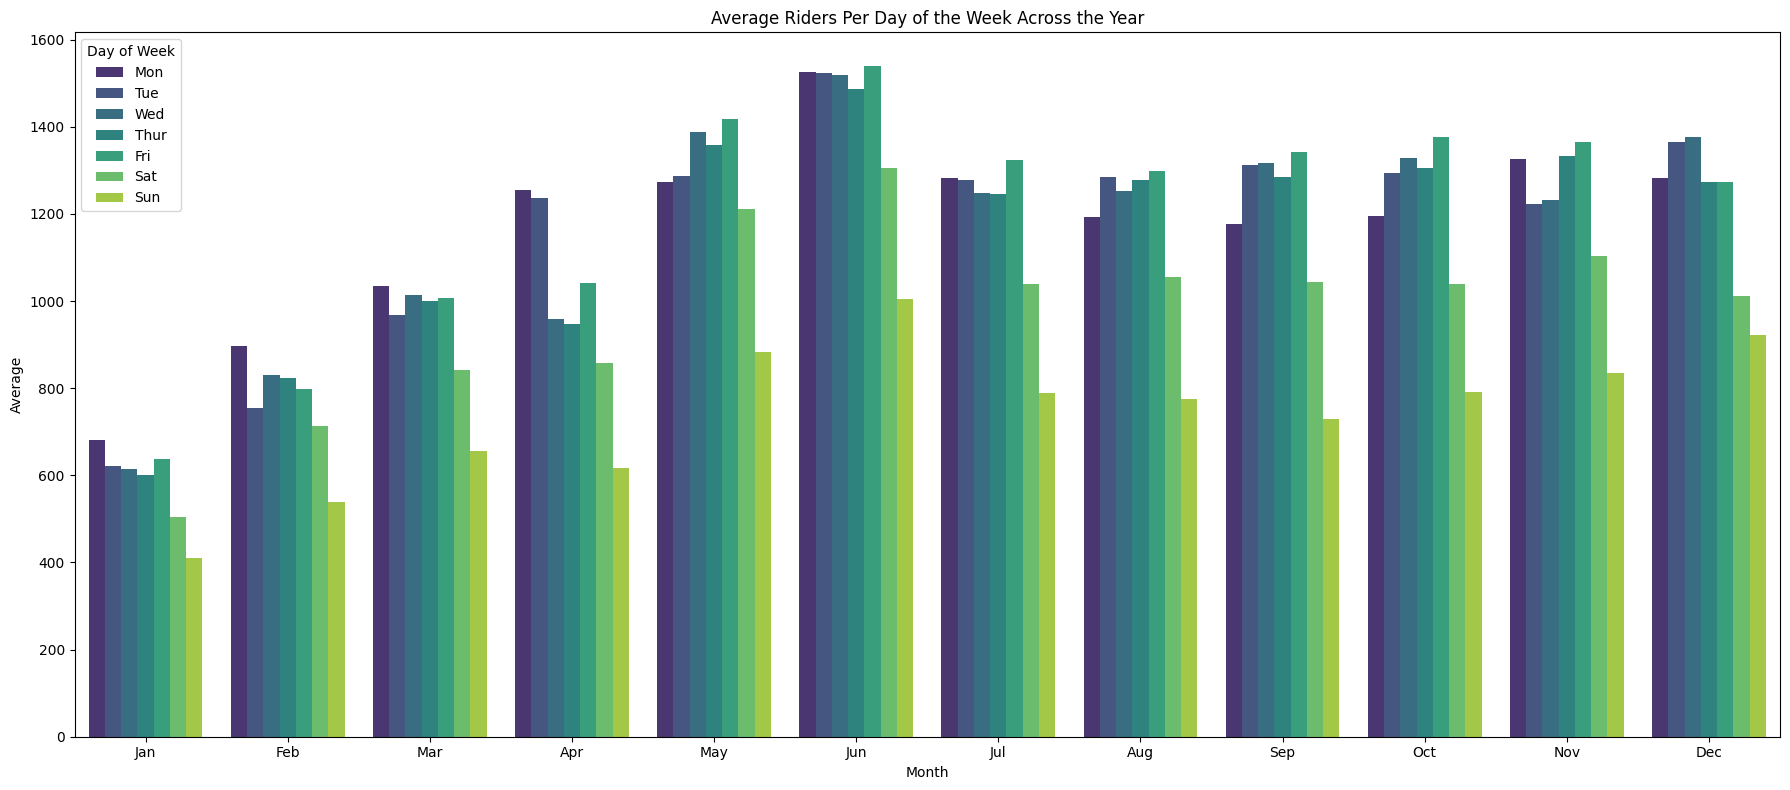

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Month', y='Average',hue='Day of Week', data=df.groupby(["Month", "Day of Week"], as_index = False)["Average"].mean(), palette='viridis').set(title = "Average Riders Per Day of the Week Across the Year")
plt.tight_layout()

# Hourly Trends

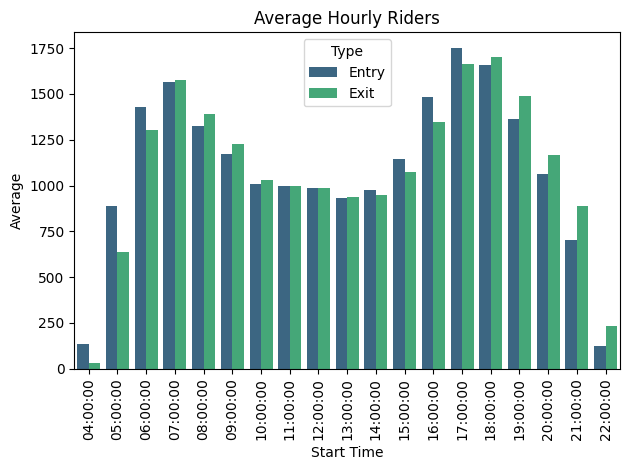

In [ ]:
sns.barplot(x='Start Time', y='Average',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Average"].mean(), palette='viridis').set(title = "Average Hourly Riders")
plt.xticks(rotation=90)
plt.tight_layout()

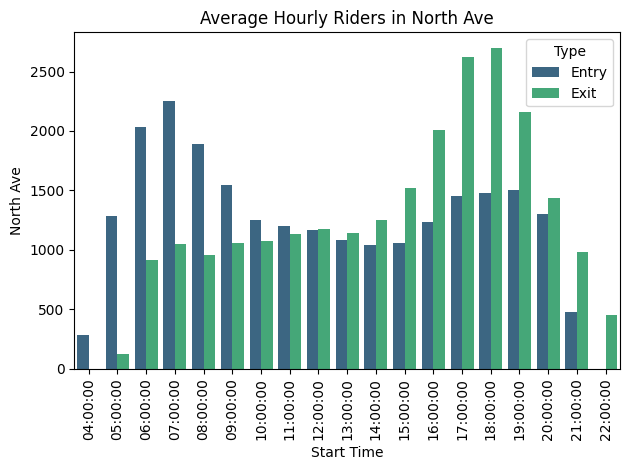

In [ ]:
sns.barplot(x='Start Time', y='North Ave',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["North Ave"].mean(), palette='viridis').set(title = "Average Hourly Riders in North Ave")
plt.xticks(rotation=90)
plt.tight_layout()

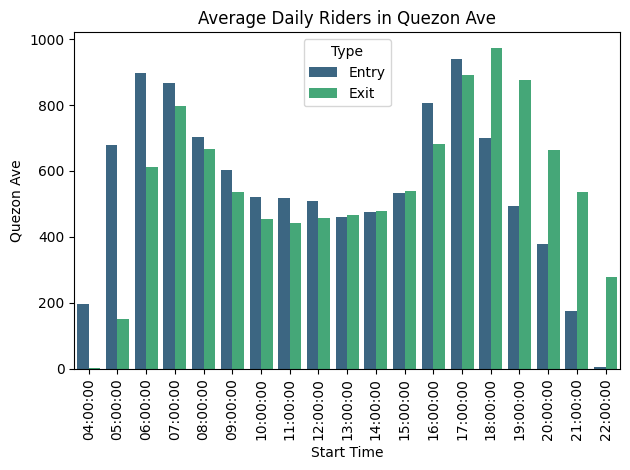

In [ ]:
sns.barplot(x='Start Time', y='Quezon Ave',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Quezon Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Quezon Ave")
plt.xticks(rotation=90)
plt.tight_layout()

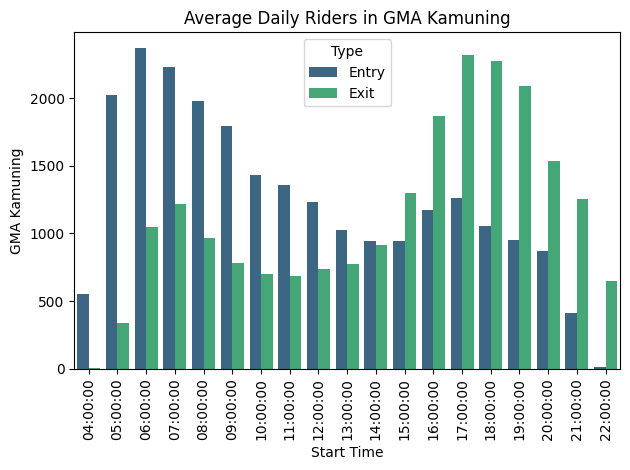

In [ ]:
sns.barplot(x='Start Time', y='GMA Kamuning',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["GMA Kamuning"].mean(), palette='viridis').set(title = "Average Daily Riders in GMA Kamuning")
plt.xticks(rotation=90)
plt.tight_layout()

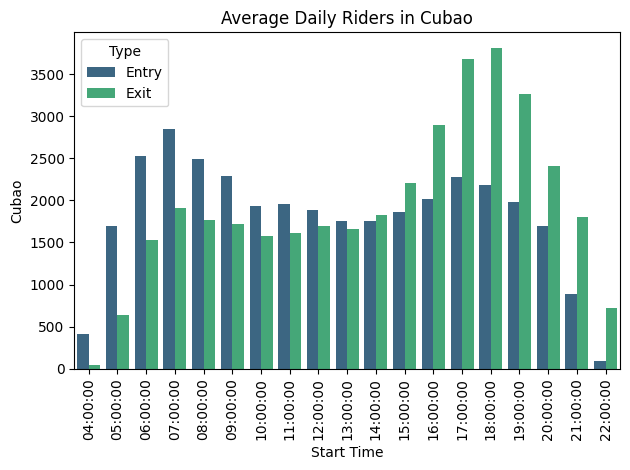

In [ ]:
sns.barplot(x='Start Time', y='Cubao',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Cubao"].mean(), palette='viridis').set(title = "Average Daily Riders in Cubao")
plt.xticks(rotation=90)
plt.tight_layout()

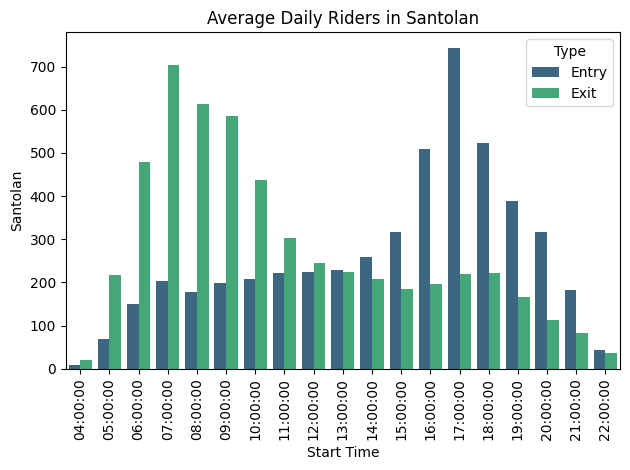

In [ ]:
sns.barplot(x='Start Time', y='Santolan',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Santolan"].mean(), palette='viridis').set(title = "Average Daily Riders in Santolan")
plt.xticks(rotation=90)
plt.tight_layout()

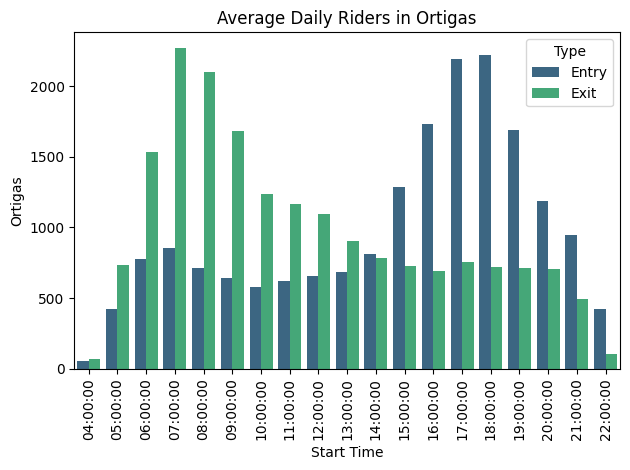

In [ ]:
sns.barplot(x='Start Time', y='Ortigas',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Ortigas"].mean(), palette='viridis').set(title = "Average Daily Riders in Ortigas")
plt.xticks(rotation=90)
plt.tight_layout()

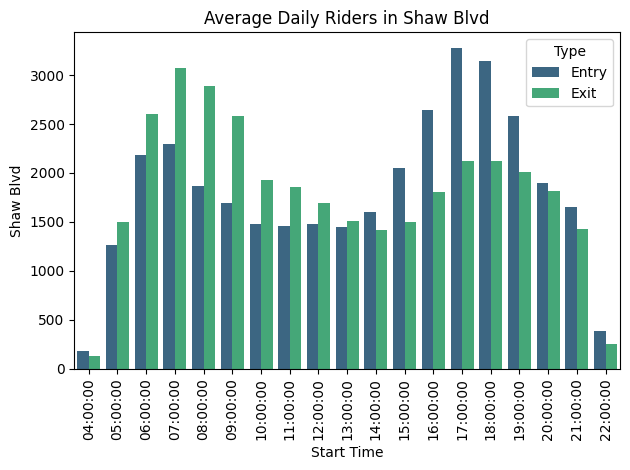

In [ ]:
sns.barplot(x='Start Time', y='Shaw Blvd',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Shaw Blvd"].mean(), palette='viridis').set(title = "Average Daily Riders in Shaw Blvd")
plt.xticks(rotation=90)
plt.tight_layout()

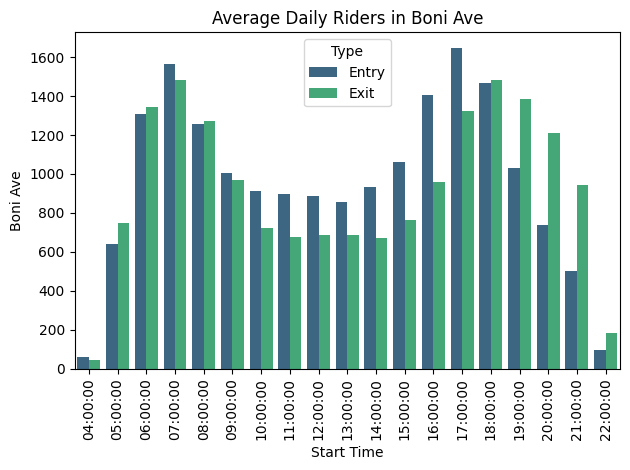

In [ ]:
sns.barplot(x='Start Time', y='Boni Ave',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Boni Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Boni Ave")
plt.xticks(rotation=90)
plt.tight_layout()

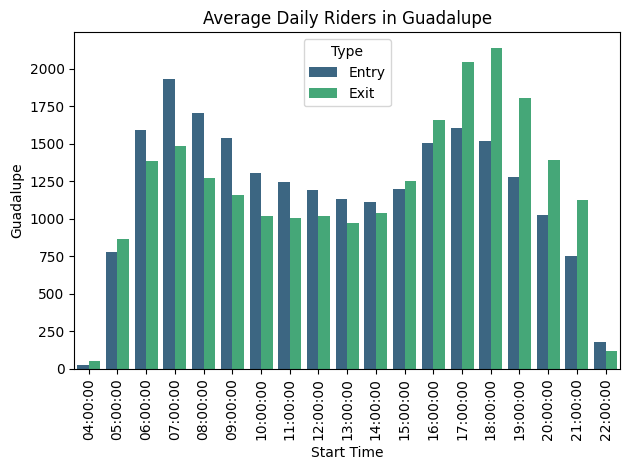

In [ ]:
sns.barplot(x='Start Time', y='Guadalupe',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Guadalupe"].mean(), palette='viridis').set(title = "Average Daily Riders in Guadalupe")
plt.xticks(rotation=90)
plt.tight_layout()

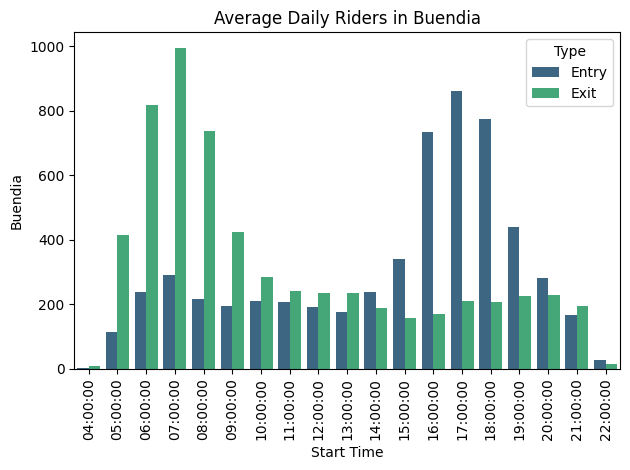

In [ ]:
sns.barplot(x='Start Time', y='Buendia',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Buendia"].mean(), palette='viridis').set(title = "Average Daily Riders in Buendia")
plt.xticks(rotation=90)
plt.tight_layout()

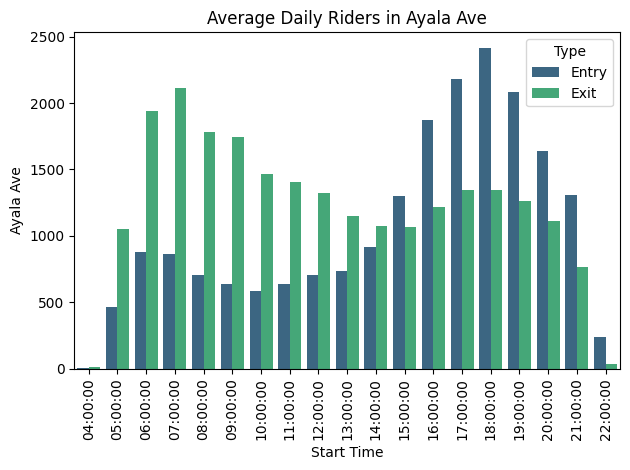

In [ ]:
sns.barplot(x='Start Time', y='Ayala Ave',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Ayala Ave"].mean(), palette='viridis').set(title = "Average Daily Riders in Ayala Ave")
plt.xticks(rotation=90)
plt.tight_layout()

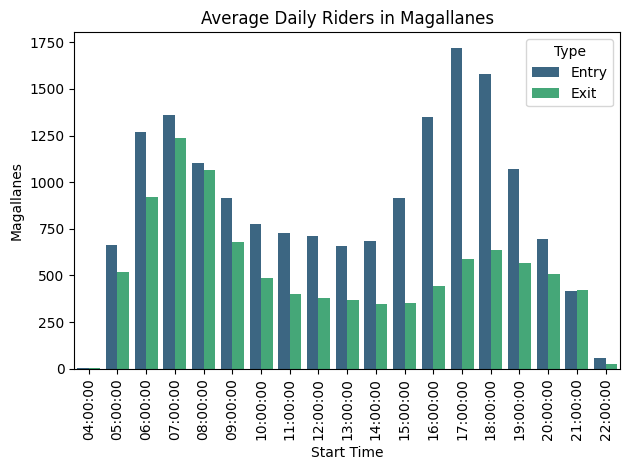

In [ ]:
sns.barplot(x='Start Time', y='Magallanes',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Magallanes"].mean(), palette='viridis').set(title = "Average Daily Riders in Magallanes")
plt.xticks(rotation=90)
plt.tight_layout()

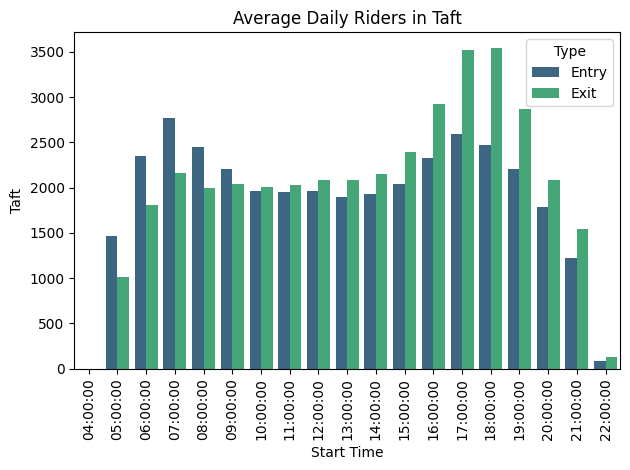

In [ ]:
sns.barplot(x='Start Time', y='Taft',hue='Type', data=df.groupby(["Start Time", "Type"], as_index = False)["Taft"].mean(), palette='viridis').set(title = "Average Daily Riders in Taft")
plt.xticks(rotation=90)
plt.tight_layout()

# Full Year Overview of MRT3 Riders

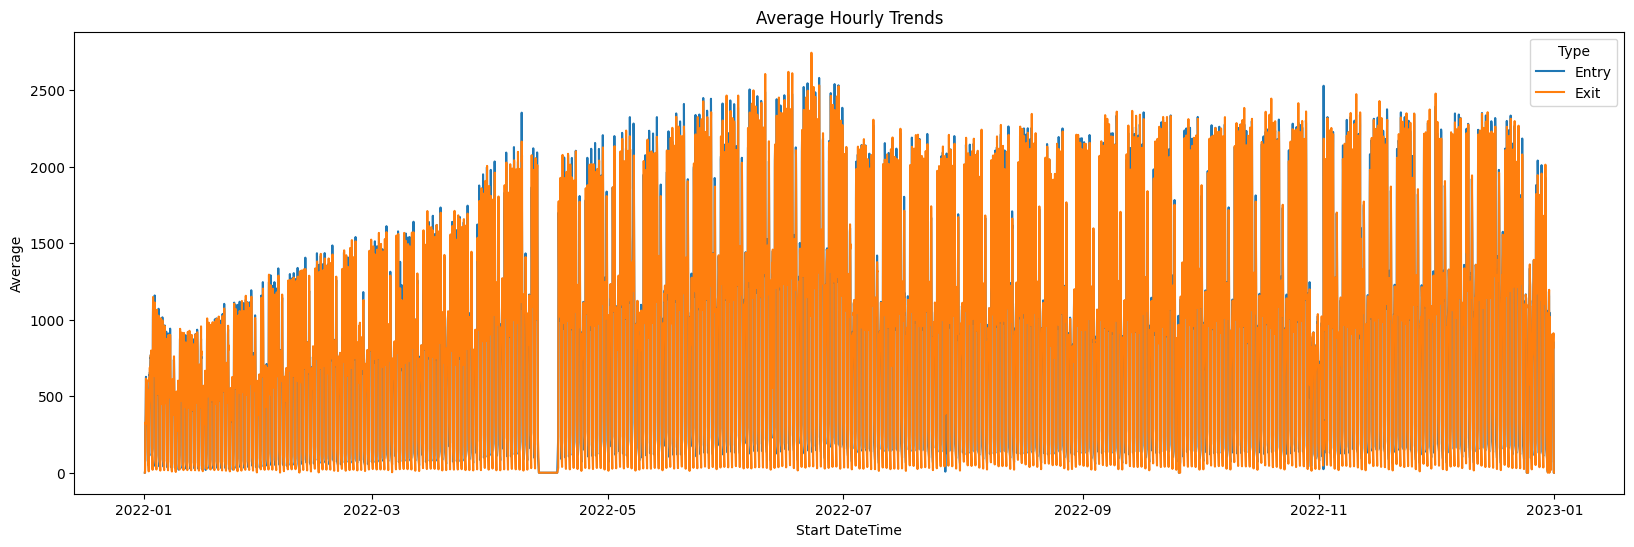

In [ ]:
df['Start DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Start Time'].astype(str))

# Station Average
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Average', hue='Type', data=df)
plt.title('Average Hourly Trends')
plt.show()

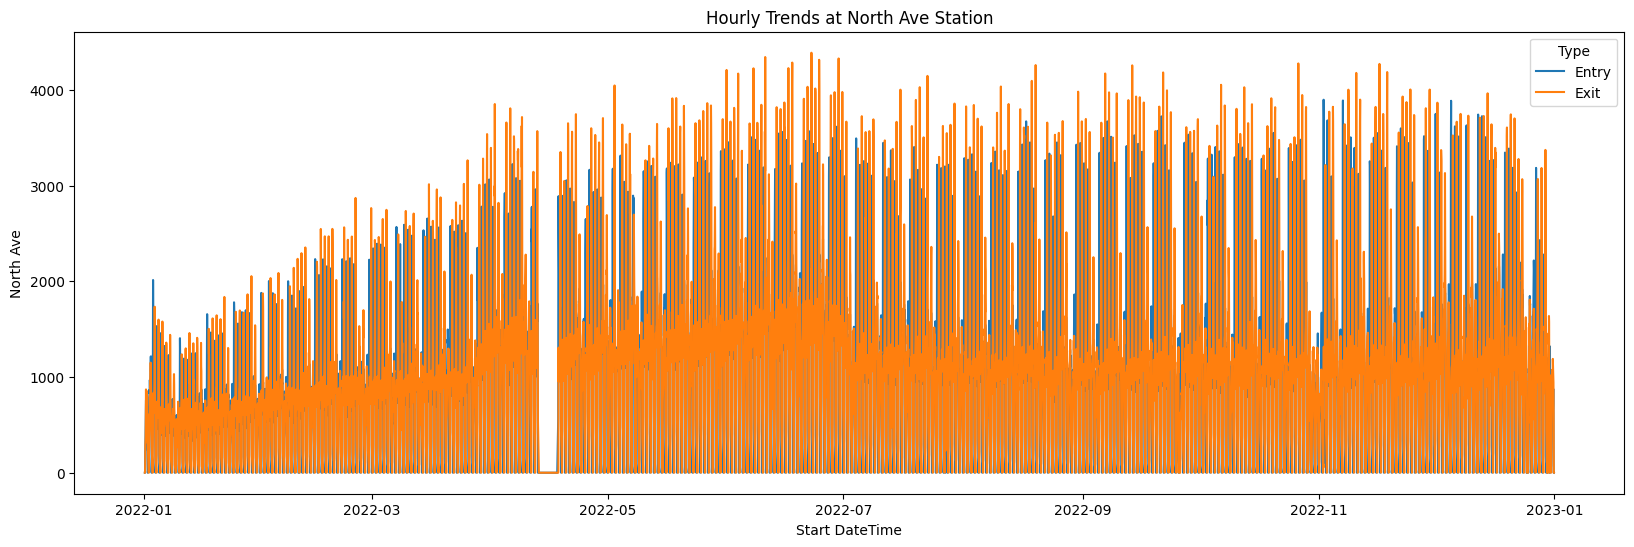

In [ ]:
# North Ave
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='North Ave', hue='Type', data=df)
plt.title('Hourly Trends at North Ave Station')
plt.show()

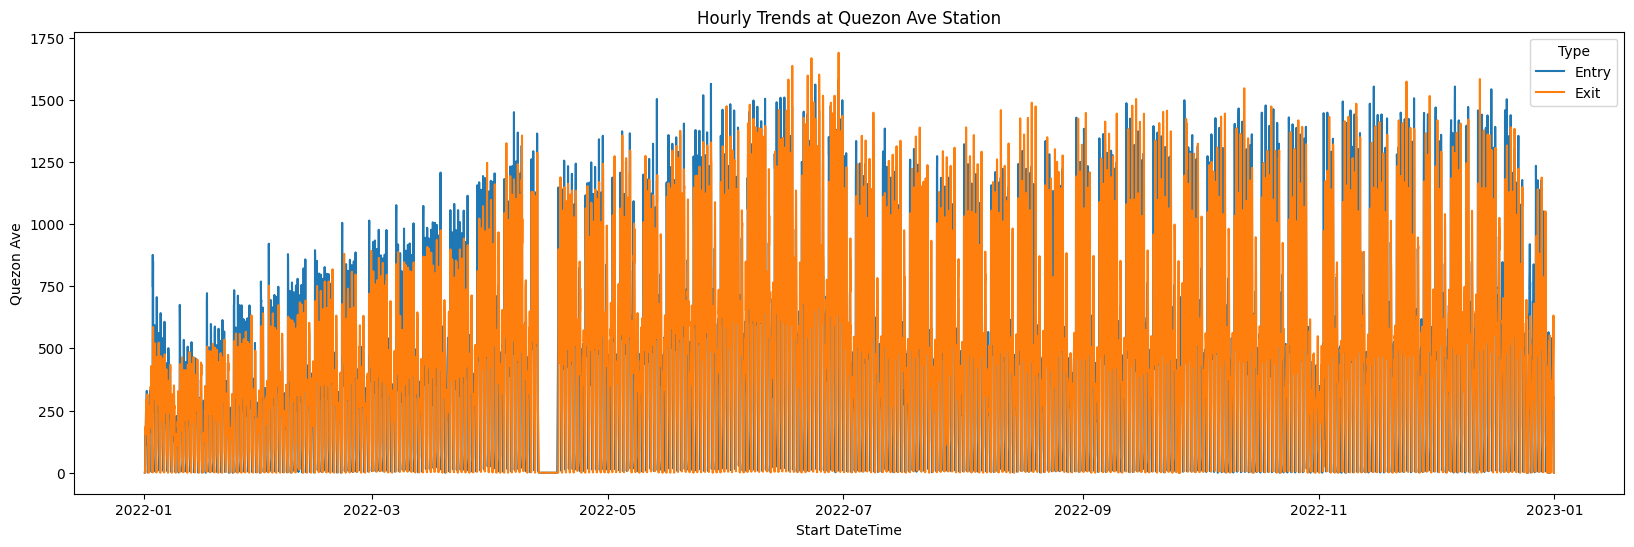

In [ ]:
# Quezon Ave
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Quezon Ave', hue='Type', data=df)
plt.title('Hourly Trends at Quezon Ave Station')
plt.show()

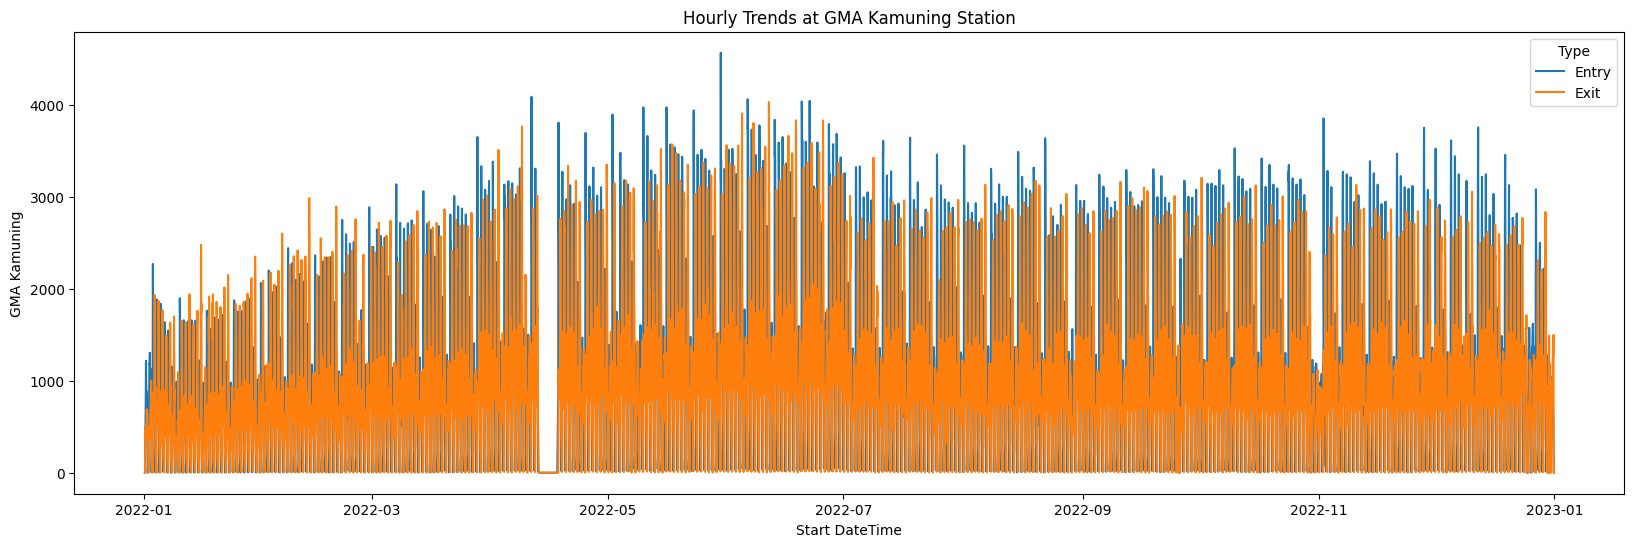

In [ ]:
# GMA Kamuning
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='GMA Kamuning', hue='Type', data=df)
plt.title('Hourly Trends at GMA Kamuning Station')
plt.show()

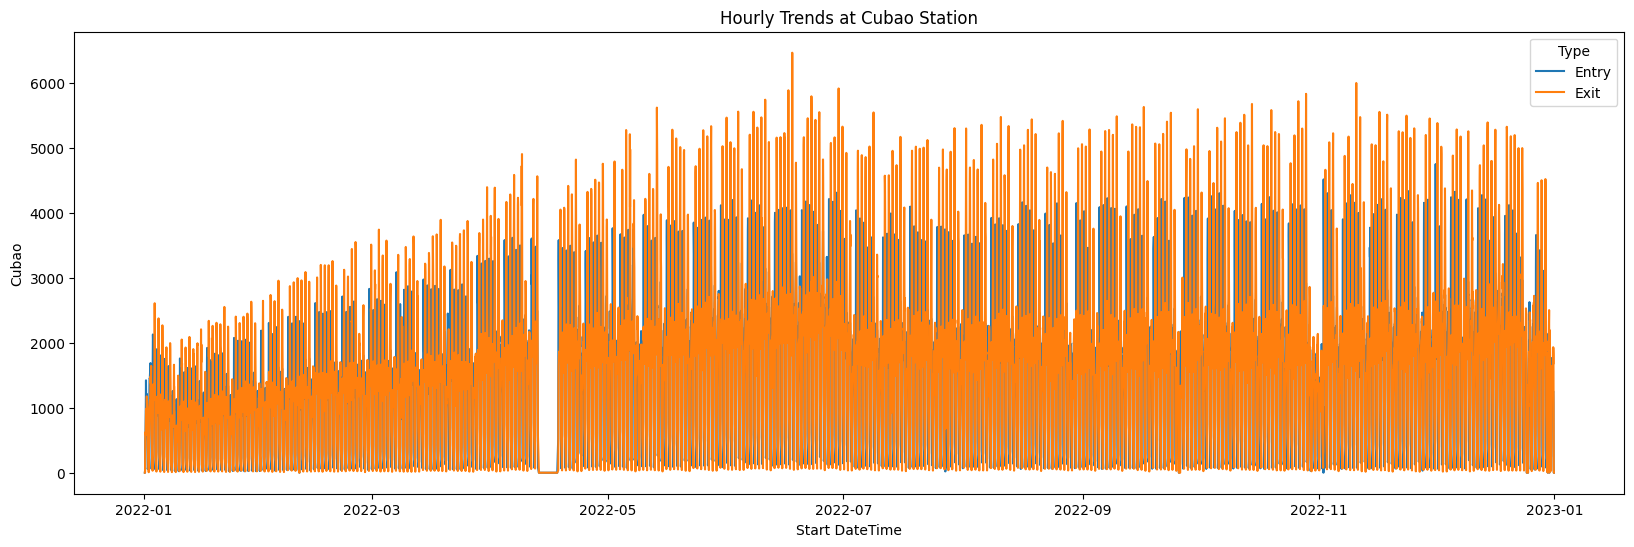

In [ ]:
# Cubao
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Cubao', hue='Type', data=df)
plt.title('Hourly Trends at Cubao Station')
plt.show()

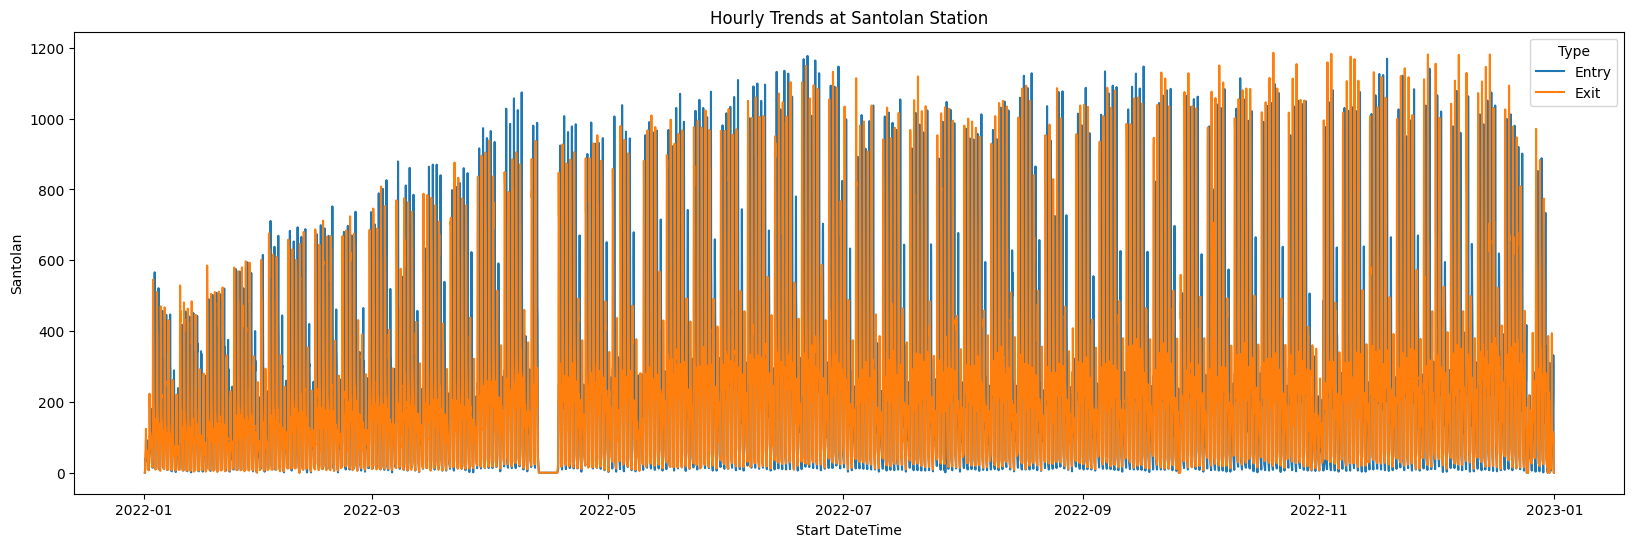

In [ ]:
# Santolan
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Santolan', hue='Type', data=df)
plt.title('Hourly Trends at Santolan Station')
plt.show()

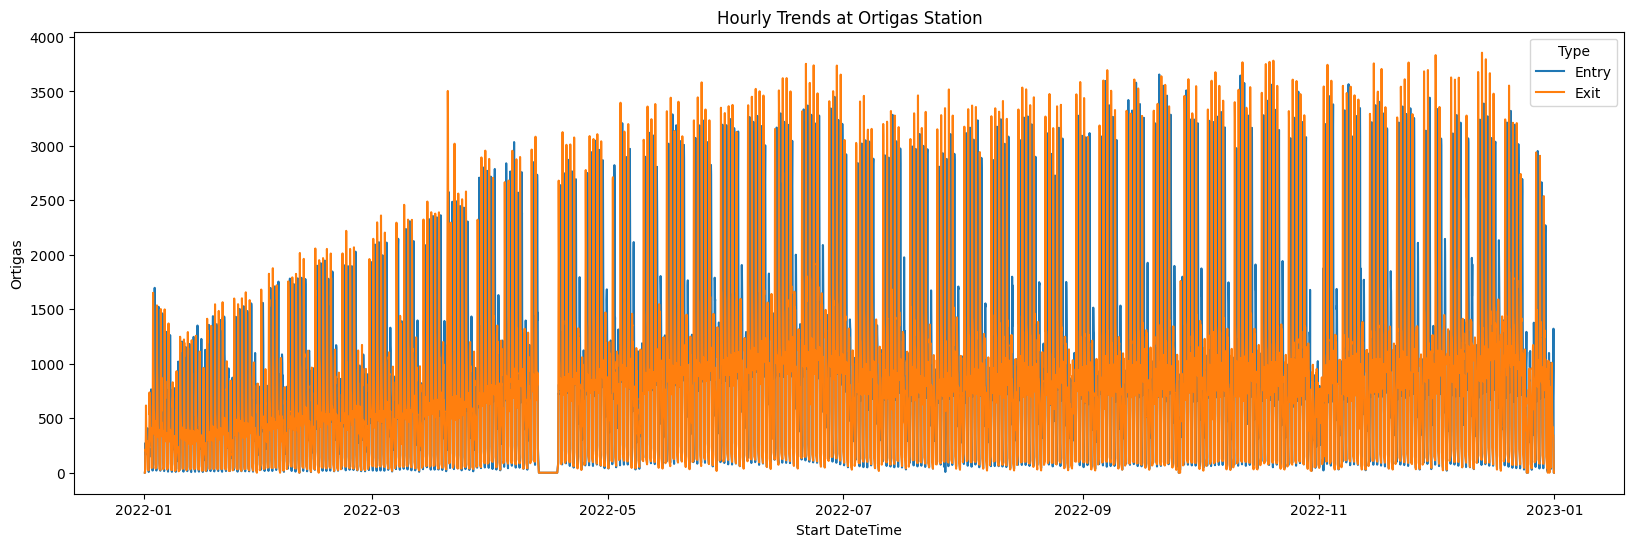

In [ ]:
# Ortigas
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Ortigas', hue='Type', data=df)
plt.title('Hourly Trends at Ortigas Station')
plt.show()

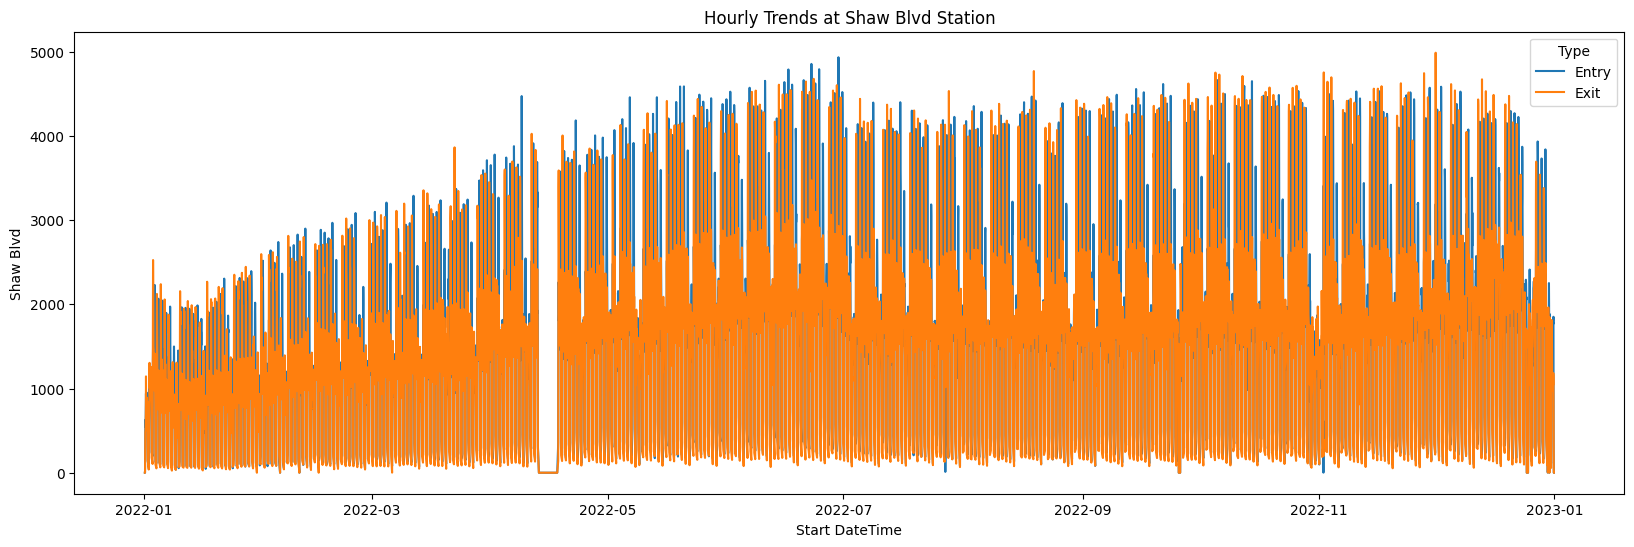

In [ ]:
# Shaw Blvd
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Shaw Blvd', hue='Type', data=df)
plt.title('Hourly Trends at Shaw Blvd Station')
plt.show()

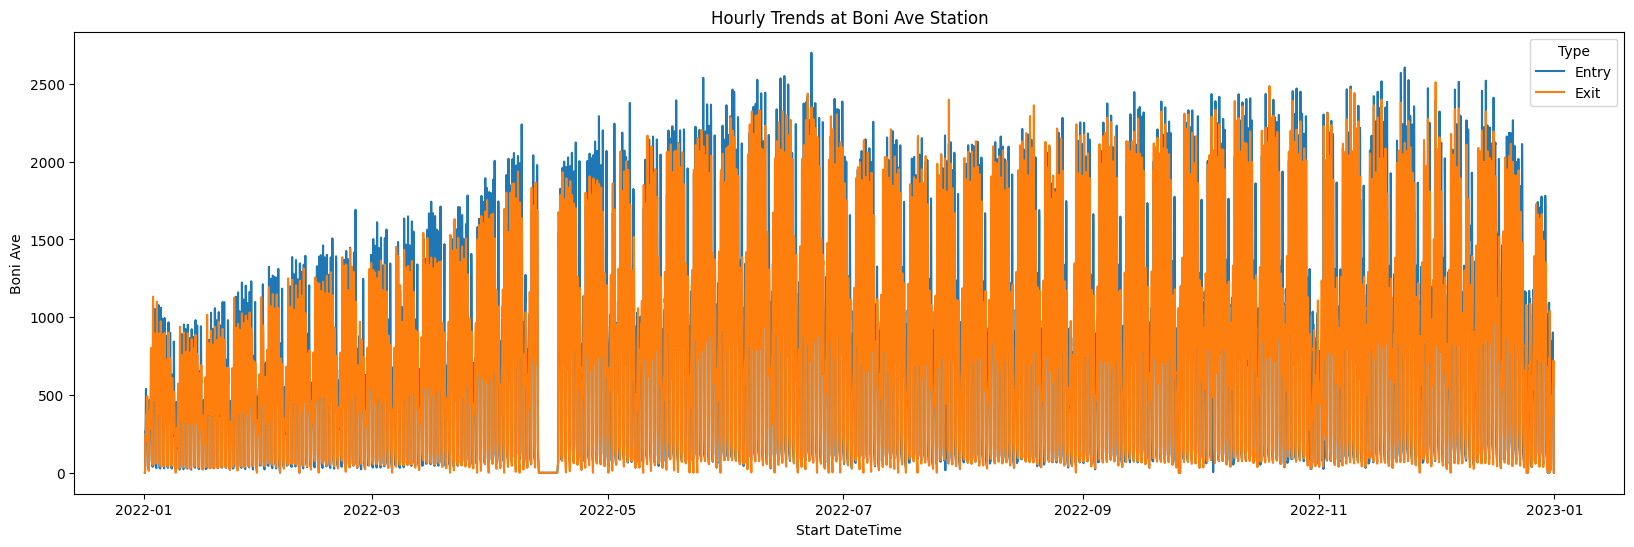

In [ ]:
# Boni Ave
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Boni Ave', hue='Type', data=df)
plt.title('Hourly Trends at Boni Ave Station')
plt.show()

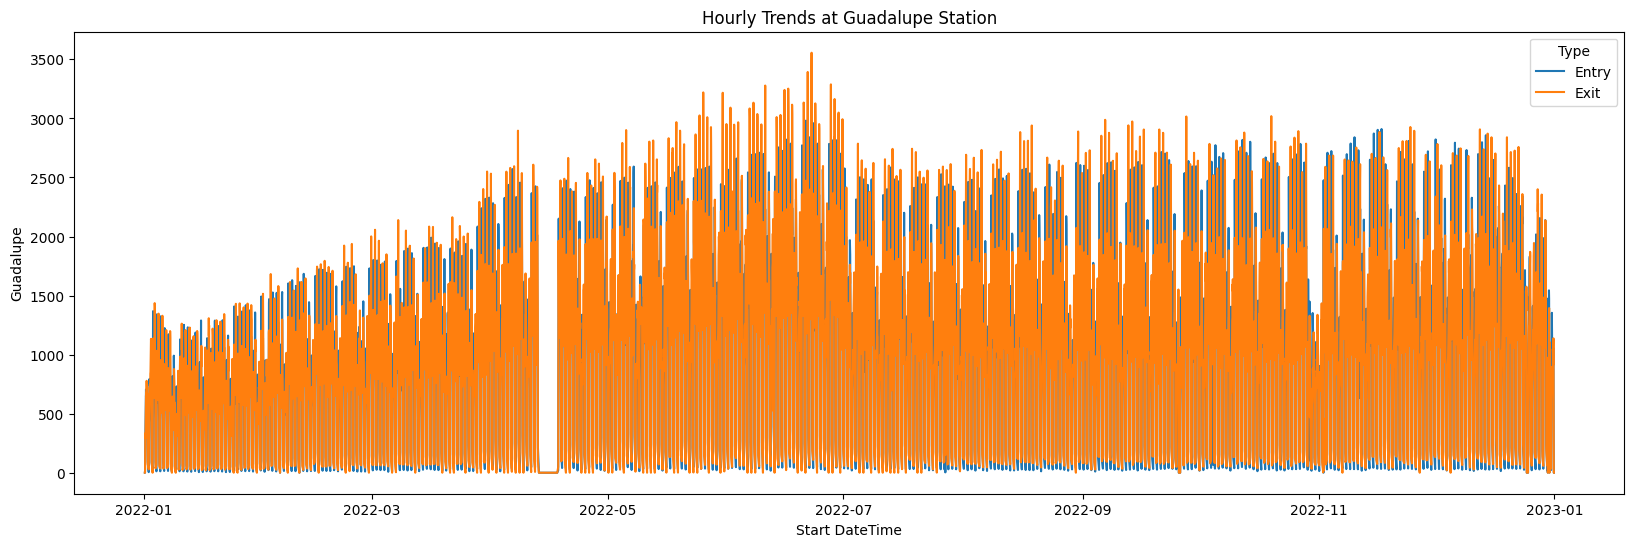

In [ ]:
# Guadalupe
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Guadalupe', hue='Type', data=df)
plt.title('Hourly Trends at Guadalupe Station')
plt.show()

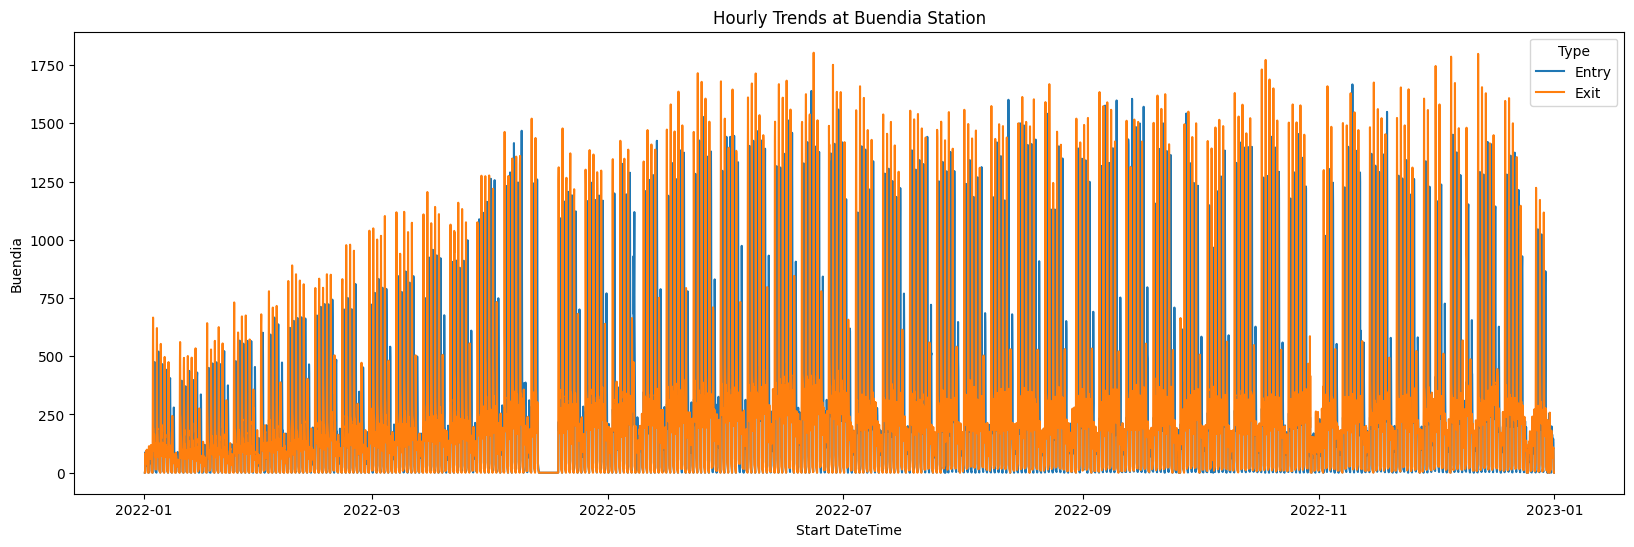

In [ ]:
# Buendia
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Buendia', hue='Type', data=df)
plt.title('Hourly Trends at Buendia Station')
plt.show()

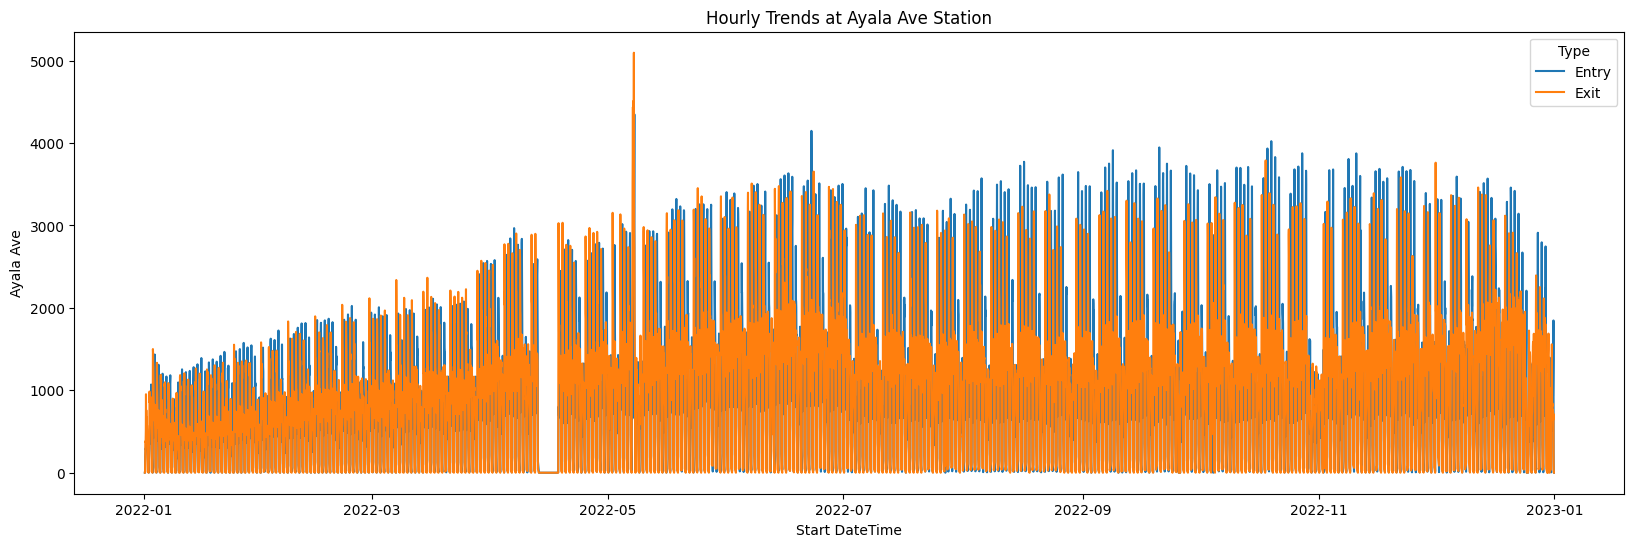

In [ ]:
# Ayala Ave
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Ayala Ave', hue='Type', data=df)
plt.title('Hourly Trends at Ayala Ave Station')
plt.show()

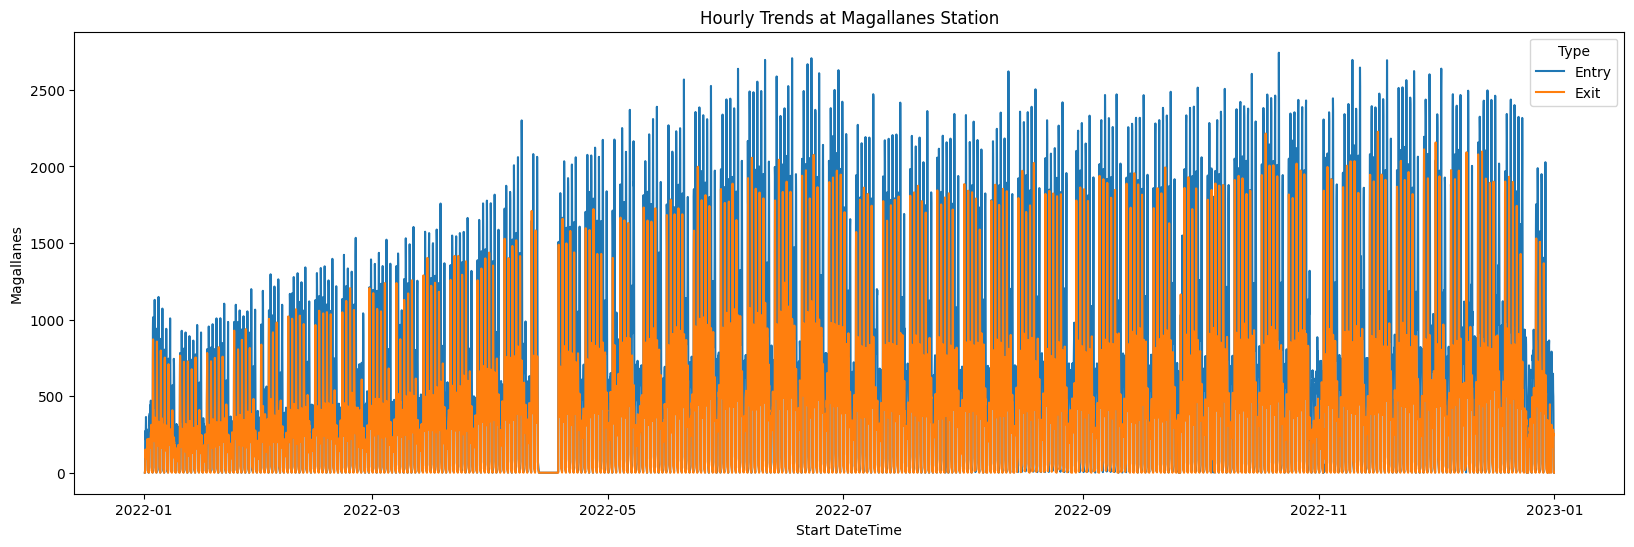

In [ ]:
# Magallanes
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Magallanes', hue='Type', data=df)
plt.title('Hourly Trends at Magallanes Station')
plt.show()

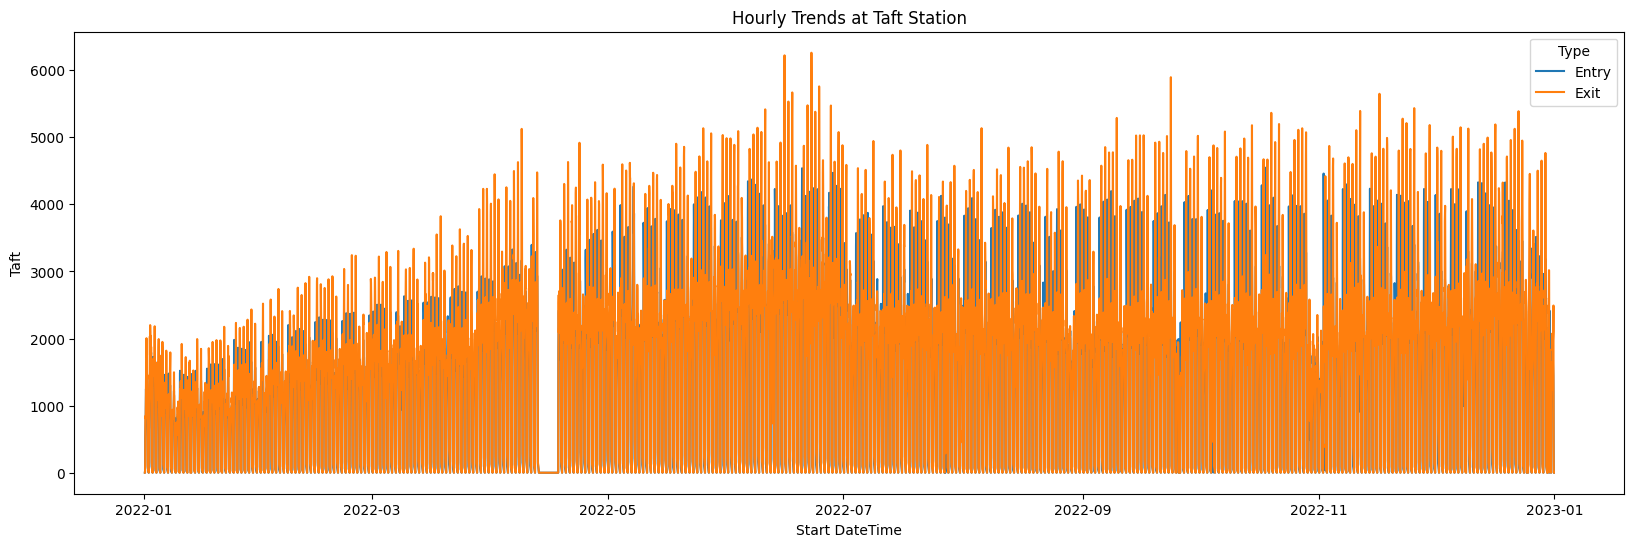

In [ ]:
# Taft
plt.figure(figsize=(20, 6))
sns.lineplot(x='Start DateTime', y='Taft', hue='Type', data=df)
plt.title('Hourly Trends at Taft Station')
plt.show()

# Analysis of Ridership Type

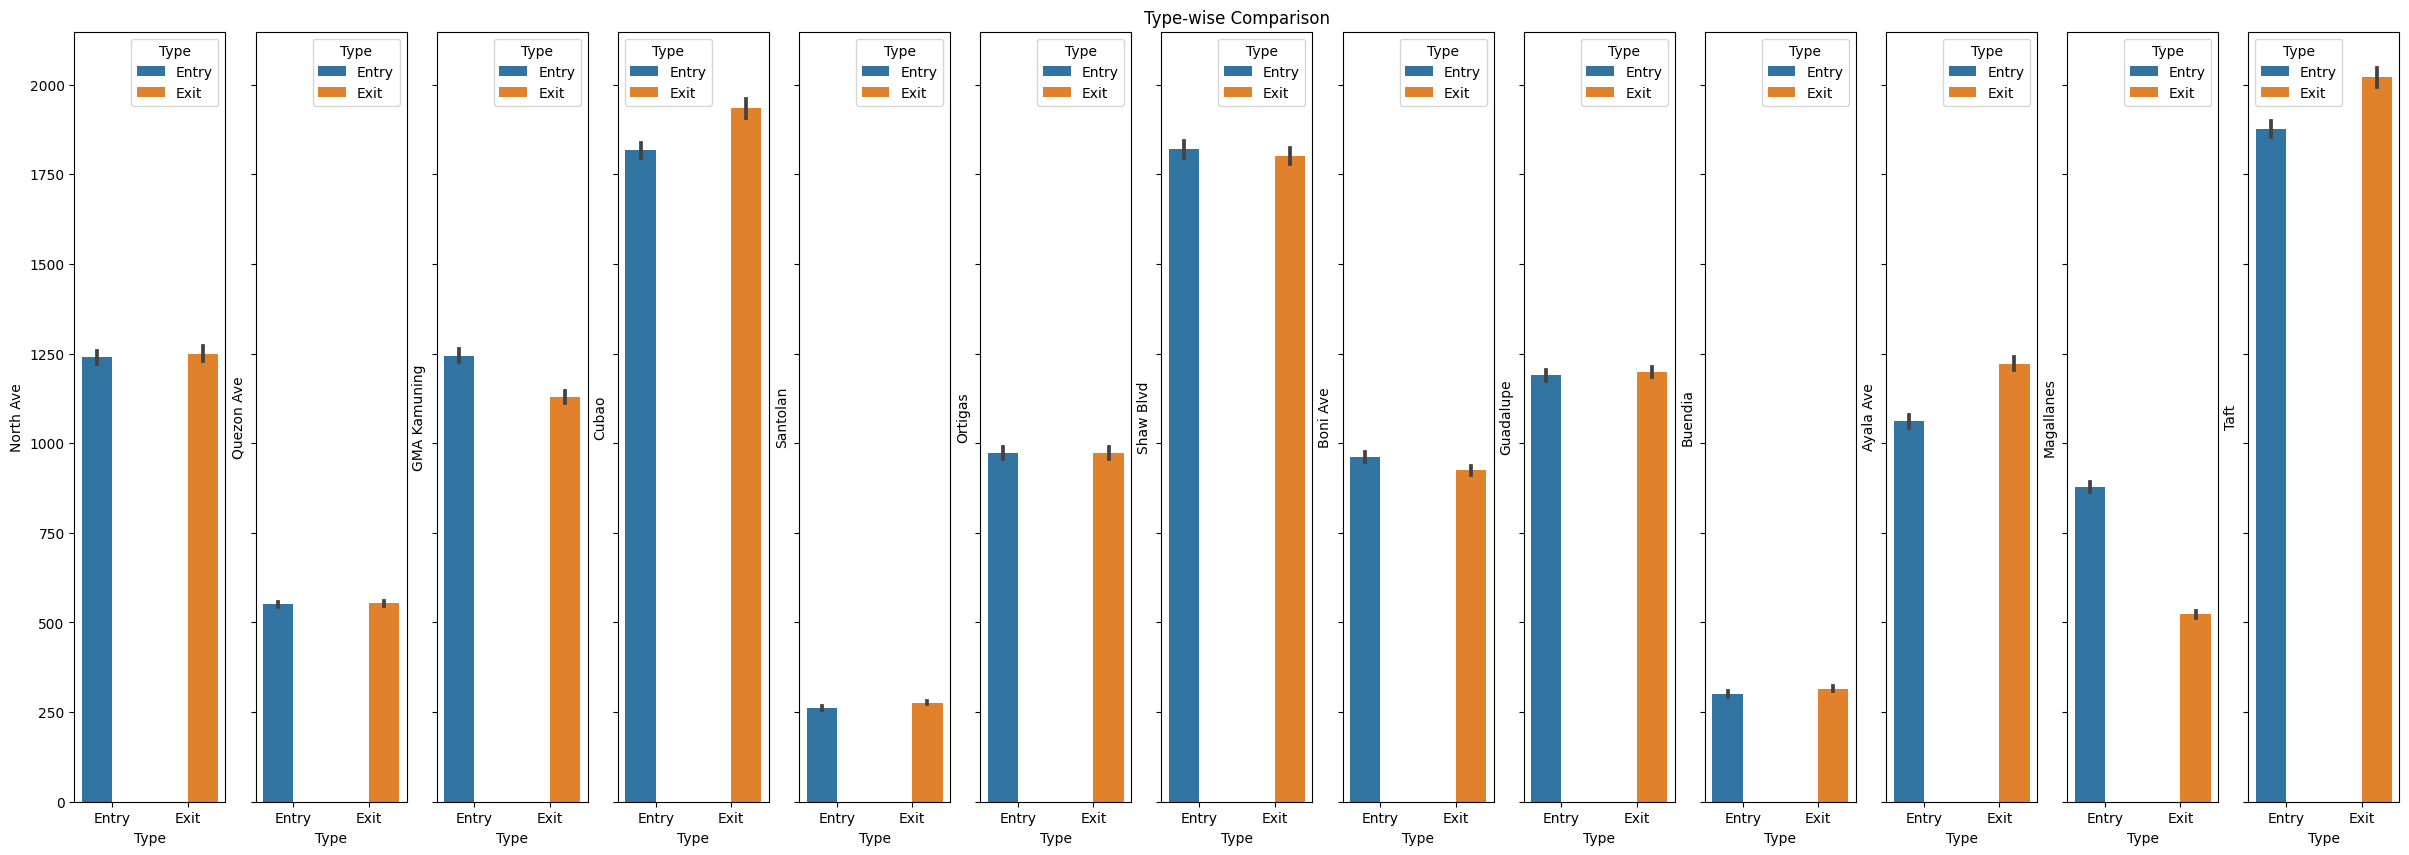

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [ ]:
# List of stations
stations = ['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd',
            'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft']

# Create subplots for each station
fig, axes = plt.subplots(1, len(stations), figsize=(30, 10), sharey=True)

# Iterate through stations
for i, station in enumerate(stations):
    plt.figure(figsize=(20, 6))
    sns.barplot(ax=axes[i], x='Type', y=station, data=df, hue='Type')
    axes[6].set(title=f'Type-wise Comparison')
    plt.tight_layout()

plt.show()

# Heat Maps

In [ ]:
df_month_day = df.groupby(["Month","Day of Week"], as_index = False)['Average'].mean()

df_month_day

0  Month Day of Week      Average
0    Jan         Mon   681.747368
1    Jan         Tue   620.868421
2    Jan         Wed   615.467105
3    Jan        Thur   599.671053
4    Jan         Fri   636.953947
..   ...         ...          ...
79   Dec         Wed  1376.618421
80   Dec        Thur  1273.731579
81   Dec         Fri  1272.326316
82   Dec         Sat  1012.278947
83   Dec         Sun   922.184211

[84 rows x 3 columns]

In [ ]:
df_month_day_pivot = pd.pivot_table(data=df_month_day,index='Month',columns='Day of Week',values='Average')

df_month_day_pivot

Day of Week          Mon          Tue          Wed         Thur          Fri  \
Month                                                                          
Jan           681.747368   620.868421   615.467105   599.671053   636.953947   
Feb           896.282895   754.414474   829.190789   824.059211   798.756579   
Mar          1035.414474   968.636842  1014.126316   999.505263  1006.039474   
Apr          1255.828947  1237.578947   958.532895   947.381579  1042.268421   
May          1274.210526  1287.863158  1389.118421  1357.776316  1417.065789   
Jun          1525.842105  1524.269737  1519.026316  1486.289474  1539.763158   
Jul          1283.092105  1278.960526  1249.039474  1244.546053  1323.684211   
Aug          1191.905263  1285.289474  1252.852632  1278.006579  1298.118421   
Sep          1177.802632  1311.953947  1317.664474  1285.489474  1341.436842   
Oct          1194.963158  1294.802632  1328.078947  1305.197368  1376.026316   
Nov          1325.059211  1222.426316  1231.373684  1332.394737  1365.960526   
Dec          1282.539474  1365.585526  1376.618421  1273.731579  1272.326316   

Day of Week          Sat          Sun  
Month                                  
Jan           505.273684   409.205263  
Feb           713.578947   539.151316  
Mar           840.967105   656.618421  
Apr           857.389474   617.723684  
May          1210.467105   882.284211  
Jun          1305.473684  1003.828947  
Jul          1040.005263   788.457895  
Aug          1054.907895   775.197368  
Sep          1043.039474   730.361842  
Oct          1039.784211   791.342105  
Nov          1104.177632   835.223684  
Dec          1012.278947   922.184211

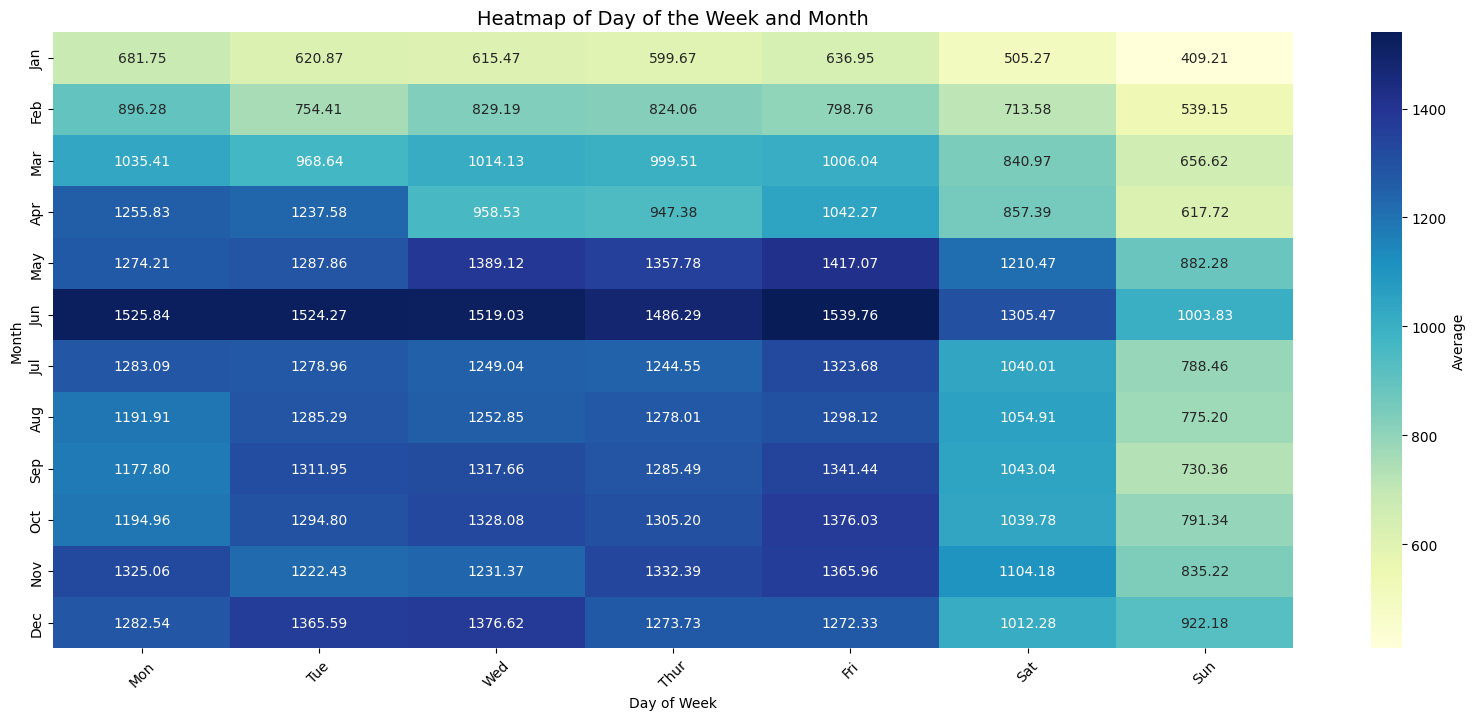

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_month_day_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average'})
plt.title('Heatmap of Day of the Week and Month', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

In [ ]:
df_day_hour = df.groupby(["Day of Week","Start Time"], as_index = False)['Average'].mean()

df_day_hour

0   Day of Week Start Time      Average
0           Mon   04:00:00   134.201923
1           Mon   05:00:00   984.442308
2           Mon   06:00:00  1565.653846
3           Mon   07:00:00  1732.740385
4           Mon   08:00:00  1526.807692
..          ...        ...          ...
128         Sun   18:00:00  1003.500000
129         Sun   19:00:00   978.269231
130         Sun   20:00:00   852.586538
131         Sun   21:00:00   656.817308
132         Sun   22:00:00   170.086538

[133 rows x 3 columns]

In [ ]:
df_day_hour_pivot = pd.pivot_table(data=df_day_hour,index='Day of Week',columns='Start Time',values='Average')

df_day_hour_pivot

Start Time     04:00:00    05:00:00     06:00:00     07:00:00     08:00:00  \
Day of Week                                                                  
Mon          134.201923  984.442308  1565.653846  1732.740385  1526.807692   
Tue          100.144231  912.971154  1643.653846  1883.009615  1587.730769   
Wed           88.711538  850.057692  1587.894231  1907.288462  1577.730769   
Thur          84.307692  847.500000  1604.538462  1884.682692  1571.403846   
Fri           80.384615  811.971154  1546.990385  1817.028846  1495.192308   
Sat           56.349057  596.830189  1053.773585  1123.122642  1042.632075   
Sun           38.307692  346.730769   560.317308   645.432692   718.048077   

Start Time      09:00:00     10:00:00     11:00:00     12:00:00     13:00:00  \
Day of Week                                                                    
Mon          1327.038462  1113.307692  1075.394231  1034.144231   968.028846   
Tue          1313.288462  1076.240385  1019.336538   980.634615   916.750000   
Wed          1283.942308  1056.894231  1024.942308   980.365385   926.115385   
Thur         1279.586538  1061.807692  1000.576923   965.548077   906.375000   
Fri          1290.951923  1081.490385  1058.384615  1062.951923  1001.115385   
Sat          1038.207547   938.915094   957.716981  1010.981132   977.160377   
Sun           867.875000   818.855769   851.615385   858.692308   844.000000   

Start Time      14:00:00     15:00:00     16:00:00     17:00:00     18:00:00  \
Day of Week                                                                    
Mon          1001.250000  1133.567308  1445.586538  1824.490385  1816.846154   
Tue           945.836538  1100.201923  1469.336538  1850.250000  1850.461538   
Wed           941.846154  1119.153846  1473.711538  1887.096154  1905.413462   
Thur          931.384615  1092.721154  1471.182692  1868.173077  1885.461538   
Fri          1037.769231  1202.778846  1576.509615  1919.451923  1897.461538   
Sat           998.141509  1148.669811  1447.028302  1551.632075  1404.641509   
Sun           882.778846   968.038462  1022.932692  1047.317308  1003.500000   

Start Time      19:00:00     20:00:00    21:00:00    22:00:00  
Day of Week                                                    
Mon          1486.394231  1123.817308  782.846154  154.019231  
Tue          1577.509615  1201.201923  830.855769  166.000000  
Wed          1570.144231  1216.961538  845.365385  169.692308  
Thur         1534.105769  1197.605769  848.442308  173.115385  
Fri          1610.769231  1271.932692  903.384615  226.038462  
Sat          1227.556604   949.349057  701.028302  189.811321  
Sun           978.269231   852.586538  656.817308  170.086538

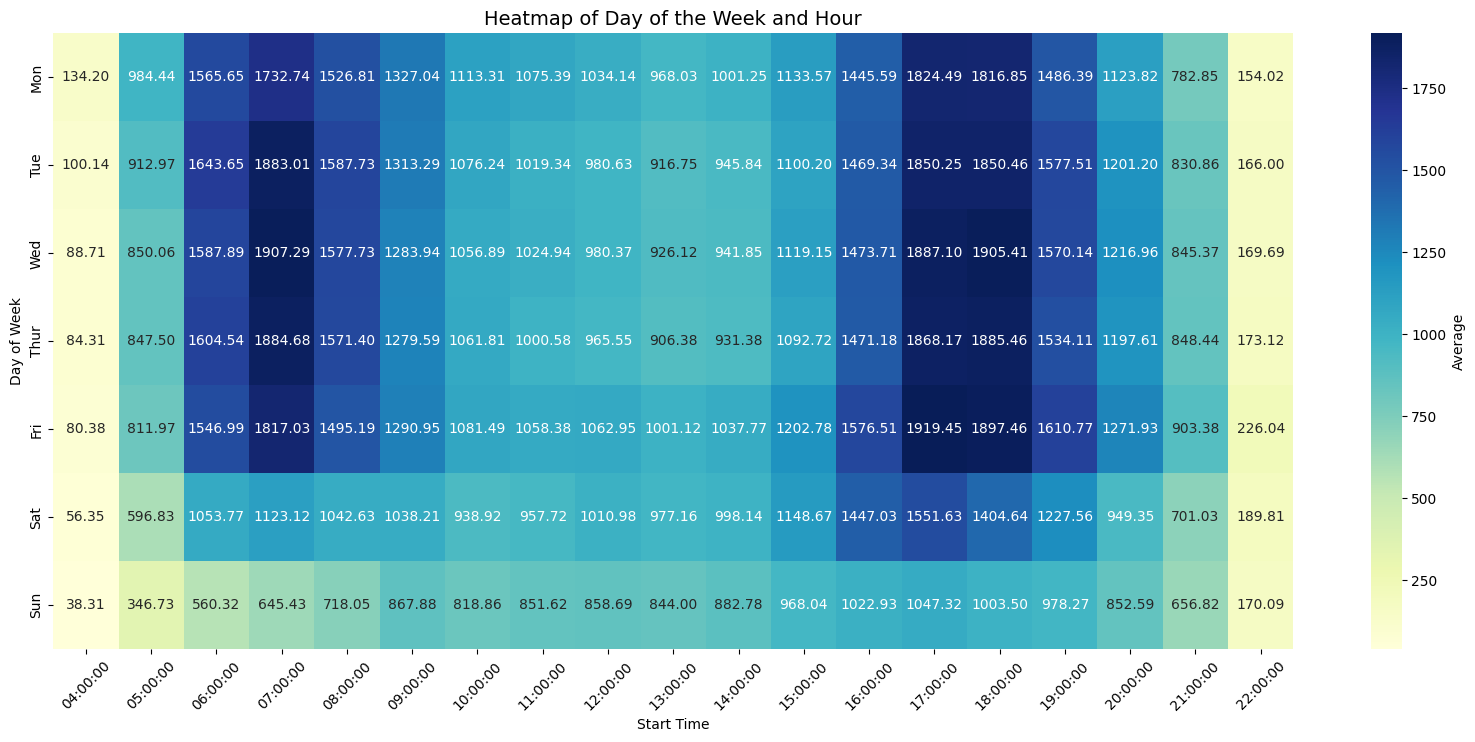

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_day_hour_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average'})
plt.title('Heatmap of Day of the Week and Hour', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

## Correlation Coefficient TYPE vs station
#A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. In other words, it reflects how similar the measurements of two or more variables are across a dataset. Correlation coefficient value



##### Close to 1 or -1: Strong correlation.
####Around 0.7 to 0.3 or -0.7 to -0.3: Moderate correlation.
####Close to 0: Weak or no correlation.

In [ ]:
entry_by_station = df[df['Type'] == "Entry"]

entry_by_station_clean = entry_by_station[['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft']]

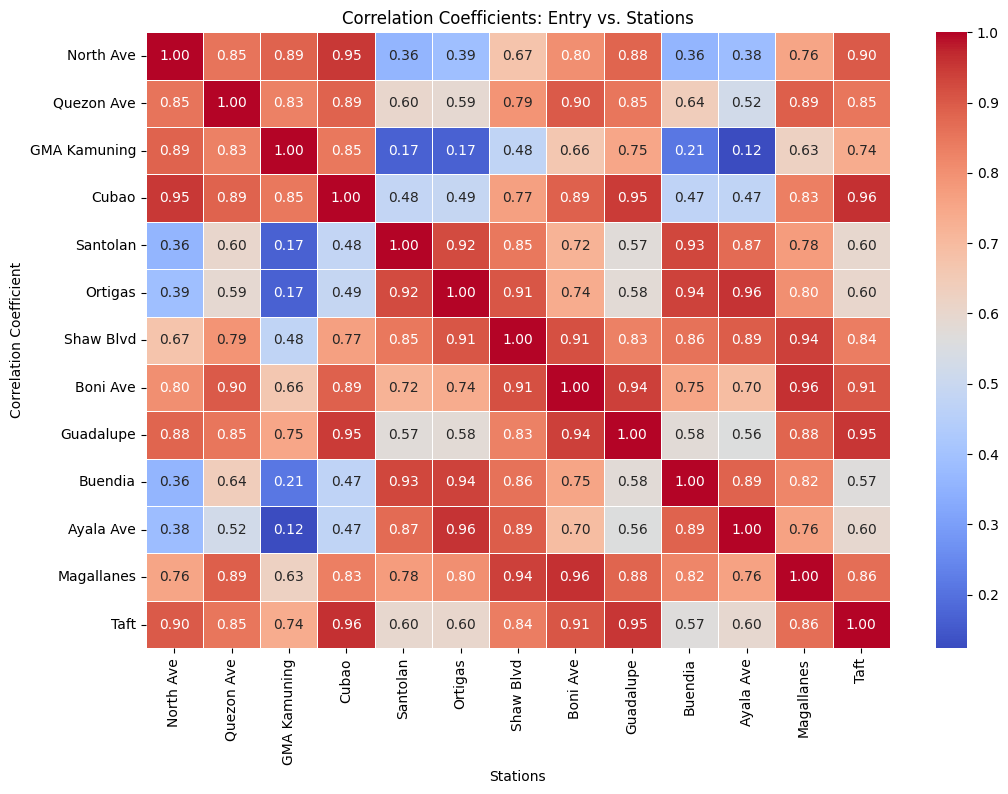

In [ ]:
entry_corr = entry_by_station_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(entry_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Coefficients: Entry vs. Stations')
plt.xlabel('Stations')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
exit_by_station = df[df['Type'] == "Exit"]

exit_by_station_clean = exit_by_station[['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft']]

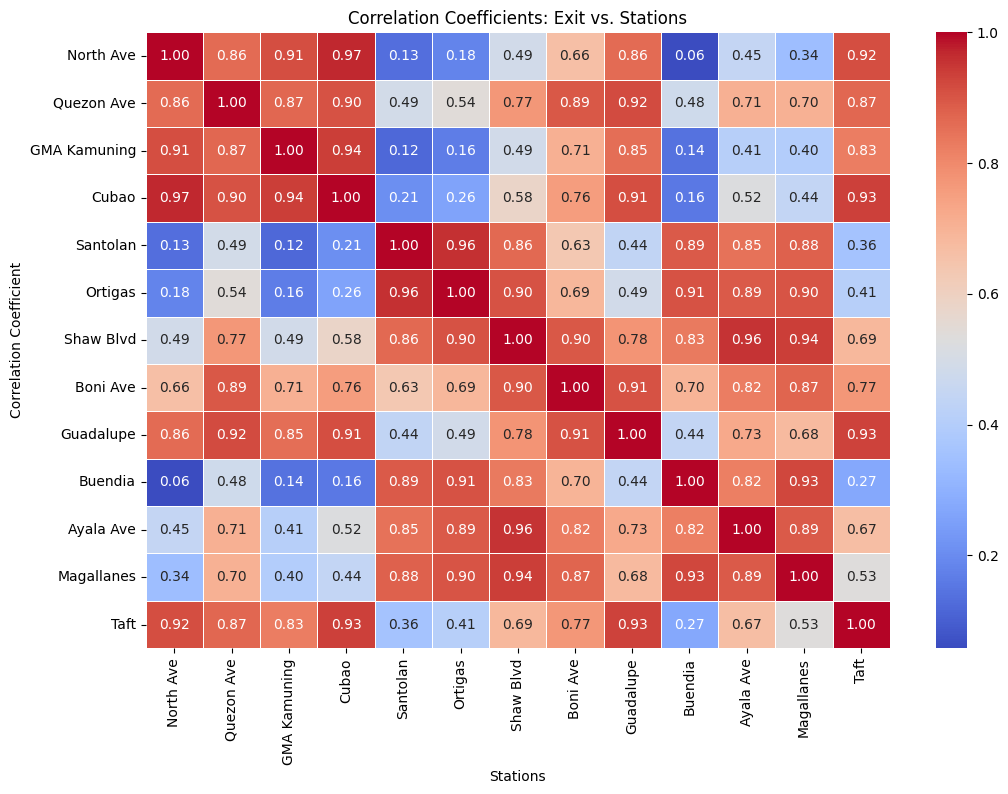

In [ ]:
exit_corr = exit_by_station_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(exit_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Coefficients: Exit vs. Stations')
plt.xlabel('Stations')
plt.ylabel('Correlation Coefficient')
plt.show()

[Text(0.5, 1.0, 'Correlation Coefficients: Exit vs. Stations'),
 Text(0.5, 47.7222222222222, 'Stations'),
 Text(1085.0378787878785, 0.5, 'Correlation Coefficient')]

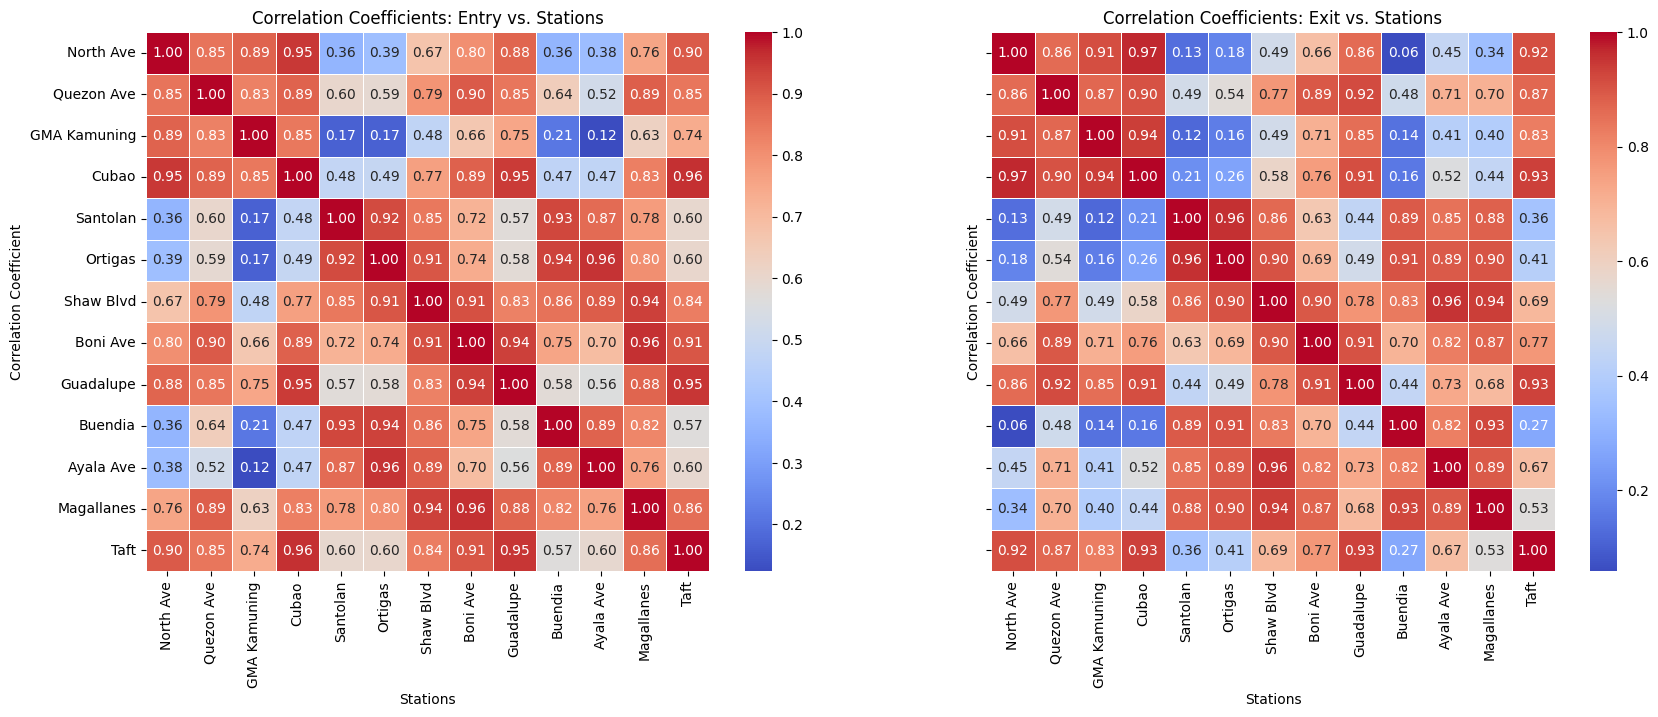

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.heatmap(entry_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, ax=axes[0])
axes[0].set(title='Correlation Coefficients: Entry vs. Stations', xlabel='Stations', ylabel='Correlation Coefficient')

sns.heatmap(exit_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, ax=axes[1])
axes[1].set(title='Correlation Coefficients: Exit vs. Stations', xlabel='Stations', ylabel='Correlation Coefficient')

# **PHASE 6: RECOMMENDATIONS**

To re-state the objectives of the data-science project the group needs to be able to determine the optimal time to ride/optimal time for MRT's management to fix. The researchers applied a Univeriate and Bivariate analysis of the Passenger, Station, and Time data available in order to draw the following recommendations:

##**1. Station Optimization & Service Planning**
- MRT Management should consider peak rush-hour times and provide strategic implementations such as optimized staffing, increased security measures, and maintenance scheduling.
 - Maintenance Scheduling: Should be done either during Saturdays and on January - provided that this will affect the least amount of riders.
 - Optimized Staffing: Staffing should be optimized towards peak-hours, peak-days, and peak-months in order to better allocate resources throughout the course of operations throughout the year.
 - Increased Security Measures: Increasing security measures should be done for the peak-hours as a more cramped station would lead to higher cases of lost items. (6:00:00 - 8:00:00 & 17:00:00-21:00:00)
- MRT Management should also target improved service towards the following high exit stations: Araneta Center-Cubao, Santolan-Annapolis, Ayala, and Taft avenue.


##**2. Dynamic Pricing Scheme**
- A dynamic ticket pricing scheme could be implemented by MRT's management to further optimize days wherein total riders are low. This could be applied to days such as Fridays and Saturdays which experience comparatively lower amounts of riders.
- This may also be done on a time basis wherein tickets sold for 05:00:00, 21:00:00 or 9:00:00-16:00:00 may be sold at a lower price to make riders lean more towards these particular timeslots for their journeys. However, it should be noted that these particular times are outside of work entries and exits.

##**3. Optimal Time to Ride**
- Based on the bivariate analysis, riders should target times outside of these gathered rush-hour peaks:
  - 6:00:00 - 8:00:00
  - 17:00:00 - 21:00:00
- Avoiding the listed peaks would improve the rider's experience as they would be able to avoid cramped MRT trains and delays of service expected out of a high influx of riders.

##**4. Data Scientists: Modeling**
- The researchers would like to make the following recommendations after having done the Univariate and Bivariate analysis.
  - From the insights generated of the correlation matrix for both entry vs. stations and exit vs. stations, it was recognized that there is a high correlation between end stations - models to be created may use this information as a determining factor for where a rider will normally board the train and to where majority of these riders will end up.
  - A low correlation between north and south stations have also been noted, the insight derived from this is that by the nature of businesses being mostly centralized, workers will need to commute from further out of central locations and head towards the center. This is reflected also within the peaks of rush-hour for entry and exit.
- However, the researchers would like to note the limitations of the study, stating that further analysis is required on the economic status of the nearby radius of stations, this could further improve the insight to see how these economic centers also play a role in determining the rider/passenger influx and outflow between each station.
 - e.g. Many riders will enter from Magallanes Station, however, more riders will exit once they reach Guadalupe station.